## Data paths

In [4]:
DATA_PATH = r"D:\datasets_complete\datasets-projects\online+retail+ii\online_retail_II.xlsx"


# Data Variable Information
**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice**: Unit price. Numeric. Product price per unit in sterling (£).

*CustomerID*: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal. The name of the country where a customer resides.

[Link to info](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

# Pipeline logic

## Pipeline functions
Pipeline functions:

- normalize_column_names

# Imports

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
path_to_functions = os.path.join(project_root, '1-cluster_retail_uci', 'functions')
sys.path.append(path_to_functions)

from functions import *


In [6]:
# # Debugging path issues
# attempt = 'ds_projects_collabs/1-cluster_retail-uci/functions'

# # Where Python thinks your notebook is
# cwd = os.getcwd()

# # The full path Python calculated
# full = os.path.join(cwd, attempt)

# print(f"1. Current Working Directory: {cwd}")
# print(f"2. Does the calculated path exist? {os.path.exists(full)}")
# print(f"3. Calculated Full Path: {full}")

# # List what is actually in the 'ds_projects_collabs' folder to check for typos
# collabs_path = os.path.join(cwd, 'ds_projects_collabs')
# if os.path.exists(collabs_path):
#     print(f"\n4. Folders found inside 'ds_projects_collabs':")
#     print([f for f in os.listdir(collabs_path) if os.path.isdir(os.path.join(collabs_path, f))])


## Data read and dataframe creation (`PANDAS`)

In [7]:
# df = pd.read_excel(DATA_PATH, sheet_name="Year 2010-2011")


In [8]:
# Saved to avoid re-loading the excel file.
# df.to_pickle('df_2010-2011.pkl')


In [9]:
# Load the pre-saved pickle file
df = pd.read_pickle('df_2010-2011.pkl')
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
display(df.describe())
df.describe(include=['O'])


,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [11]:
# Usage
df = normalize_column_names(df) # Implement normalize_column_names function

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      541910 non-null  object        
 1   stockcode    541910 non-null  object        
 2   description  540456 non-null  object        
 3   quantity     541910 non-null  int64         
 4   invoicedate  541910 non-null  datetime64[ns]
 5   price        541910 non-null  float64       
 6   customer_id  406830 non-null  float64       
 7   country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
df_column_names = df.columns.to_list()
df_column_names


['invoice',
 'stockcode',
 'description',
 'quantity',
 'invoicedate',
 'price',
 'customer_id',
 'country']

# EDA Notes

Client Clustering

- `541910` entries, `Description` and `Customer ID` do not match the number of entries (missing values).
- Negative values in `Quantity`: `-80995.000000`. It matches the **max** amount.
- Negative values in `Price`: `-11062.060000`.
- `25900` unique `Invoice` values.
- `4070` unique `StockCode` values, meaning 4070 products; but `4223` `Description` values.

### `invoice` column

In [13]:
df[df['quantity']<0].head() # Overview of `quantity` negative values 


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [14]:
# df['invoice'] = df['invoice'].astype('str')
df = df_column_to_string(df, 'invoice') # Using the function to convert 'invoice' column to string type.

df_cancellation_invoices = filter_rows_starting_with(df, 'invoice', 'C')
# df[df['invoice'].str.match("^\\d{6}$") == False] # Regex for NOT 6 consecutive numbers as invoice id

print("Invoices that are cancellations:", df_cancellation_invoices.shape[0]) # According to the data information website


'invoice' converted to string type.
object
Filtered rows where 'invoice' starts with 'C'
     invoice stockcode                       description  quantity  \
141  C536379         D                          Discount        -1   
154  C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235  C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236  C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237  C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            invoicedate  price  customer_id         country  
141 2010-12-01 09:41:00  27.50      14527.0  United Kingdom  
154 2010-12-01 09:49:00   4.65      15311.0  United Kingdom  
235 2010-12-01 10:24:00   1.65      17548.0  United Kingdom  
236 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
237 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
Invoices that are cancellations: 9288


In [15]:
# Other letters in 'invoice' column
# df['invoice'].str.replace("[0-9]", "", regex=True).unique()
remove_digits_unique(df, 'invoice')

# Output: There are invoices that start with 'C' and 'A' letters.


array(['', 'C', 'A'], dtype=object)

In [16]:
display(df[df['invoice'].str.startswith('A')].head()) # Overview of `A` invoices
# These are adjustments invoices. Erase these rows.
# List indexes to drop


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


## `stockcode` column

In [17]:
df_column_to_string(df, 'stockcode')


'stockcode' converted to string type.
object


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [47]:
# stockcodes_abnormal = df[(df['stockcode'].str.match("^\\d{5}$") == False) & (df['stockcode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['stockcode'].unique()
# Regex for NOT 5 consecutive numbers or 5 consecutive numbers followed by letters in the values of 'stockcode' column
stockcodes_abnormal, count_abnormal = get_abnormal_values(df, 'stockcode', print_list=True)

# Output: There are some abnormal stockcodes
print("Abnormal Stockcodes:", stockcodes_abnormal)


1124 abnormal values:
['85123A', '84406B', '84029G', '84029E', 'POST', '82494L', '85099C', '84997B', '84997C', '84519A', '85183B', '85071B', '37444A', '37444C', '84971S', '15056BL', '15056N', 'D', '35004C', '85049A', '85099B', '35004G', '85014B', '85014A', '84970S', '84030E', '35004B', '85049E', '17091A', '84509A', '84510A', '84709B', '84625C', '84625A', '47570B', '85049C', '85049D', '85049G', '84970L', '90199C', '90129F', '90210B', '72802C', '85169B', '85099F', '85184C', '35591T', '84032B', '85049H', '72800E', '84849B', '90200B', '90059B', '90185C', '90059E', '90059C', '90200C', '90200D', '90200A', '16258A', '85231B', '85231G', '48173C', '47563A', '84558A', '46000M', '71406C', '84985A', '84596E', '84997D', '47599A', '47599B', '85035B', '84968C', '72800B', '84563A', '47504H', '17164B', '15044B', '84569B', '85114B', '85114C', '85199L', '85199S', '85019A', '85019C', '85071A', '85071C', '85135B', '85136A', '85136C', 'C2', '35095A', '35095B', '35471D', '35598D', '35599D', '35610A', '35818P

In [ ]:
def get_abnormal_values(df, col_name, print_list=False):
    """
    Identifies unique values in a column that do not match the patterns: ^\\d{5}$ or ^\\d{5}[a-zA-Z]+$.
    """
    
    # Regex 1: Exactly 5 digits
    pattern_exact_five_digits = r"^\d{5}$"
    # Regex 2: 5 digits followed by one or more letters
    pattern_five_digits_plus_letters = r"^\d{5}[a-zA-Z]+$"

    # CRITICAL FIX: Convert column to string to ensure regex works on all rows
    col_series = df[col_name].astype(str)

    abnormal_mask = (
        (col_series.str.match(pattern_exact_five_digits) == False) & 
        (col_series.str.match(pattern_five_digits_plus_letters) == False)
    )
    
    # Extract unique values and convert to list
    unique_abnormal_values = df[abnormal_mask][col_name].unique().tolist()
    count = len(unique_abnormal_values)
    
    if print_list:
        print(f"{count} abnormal values:")
        print(unique_abnormal_values)
    
    return unique_abnormal_values, count


In [ ]:
# # Show entries witch each abnormal stockcode in stockcodes_abnormal
# for code in stockcodes_abnormal:
#     display(df[df['stockcode'] == code].head(10))


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom
280,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 10:51:00,2.55,17850.0,United Kingdom
364,536401,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-01 11:21:00,2.95,15862.0,United Kingdom
416,536406,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,2010-12-01 11:33:00,2.55,17850.0,United Kingdom
935,536502,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 12:36:00,2.95,16552.0,United Kingdom
979,536520,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2010-12-01 12:43:00,2.95,14729.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom
68,536375,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:32:00,2.75,17850.0,United Kingdom
282,536396,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 10:51:00,2.75,17850.0,United Kingdom
418,536406,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 11:33:00,2.75,17850.0,United Kingdom
3194,536609,84406B,CREAM CUPID HEARTS COAT HANGER,6,2010-12-02 09:41:00,2.75,17850.0,United Kingdom
3243,536612,84406B,CREAM CUPID HEARTS COAT HANGER,6,2010-12-02 09:44:00,2.75,17850.0,United Kingdom
3427,536628,84406B,CREAM CUPID HEARTS COAT HANGER,6,2010-12-02 10:54:00,2.75,17850.0,United Kingdom
3445,536630,84406B,CREAM CUPID HEARTS COAT HANGER,6,2010-12-02 10:56:00,2.75,17850.0,United Kingdom
3645,536638,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-02 11:41:00,3.25,16244.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 09:02:00,3.39,17850.0,United Kingdom
78,536375,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom
230,536390,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,24,2010-12-01 10:19:00,3.39,17511.0,United Kingdom
293,536396,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 10:51:00,3.39,17850.0,United Kingdom
428,536406,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 11:33:00,3.39,17850.0,United Kingdom
1755,536544,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,1,2010-12-01 14:32:00,7.62,NaN,United Kingdom
2072,536557,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-01 14:41:00,3.75,17841.0,United Kingdom
2937,536592,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-01 17:06:00,7.62,NaN,United Kingdom
3125,536600,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-02 08:32:00,3.39,17850.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
62,536373,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 09:02:00,3.39,17850.0,United Kingdom
79,536375,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom
294,536396,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 10:51:00,3.39,17850.0,United Kingdom
429,536406,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 11:33:00,3.39,17850.0,United Kingdom
444,536408,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,2010-12-01 11:41:00,3.75,14307.0,United Kingdom
708,536423,84029E,RED WOOLLY HOTTIE WHITE HEART.,8,2010-12-01 12:08:00,3.75,18085.0,United Kingdom
869,536477,84029E,RED WOOLLY HOTTIE WHITE HEART.,24,2010-12-01 12:27:00,3.39,16210.0,United Kingdom
925,536500,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-01 12:35:00,3.75,17377.0,United Kingdom
1754,536544,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,2010-12-01 14:32:00,7.62,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany
5095,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France
5325,536858,POST,POSTAGE,2,2010-12-03 10:36:00,40.0,13520.0,Switzerland
5369,536861,POST,POSTAGE,3,2010-12-03 10:44:00,18.0,12427.0,Germany
6602,536967,POST,POSTAGE,1,2010-12-03 12:57:00,18.0,12600.0,Germany
6676,536974,POST,POSTAGE,2,2010-12-03 13:59:00,18.0,12682.0,France
6973,536983,POST,POSTAGE,1,2010-12-03 14:30:00,18.0,12712.0,Germany


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
60,536373,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
77,536375,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
292,536396,82494L,WOODEN FRAME ANTIQUE WHITE,12,2010-12-01 10:51:00,2.55,17850.0,United Kingdom
427,536406,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-01 11:33:00,2.55,17850.0,United Kingdom
687,536416,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-01 11:58:00,2.95,13255.0,United Kingdom
3046,536592,82494L,WOODEN FRAME ANTIQUE WHITE,3,2010-12-01 17:06:00,2.95,NaN,United Kingdom
3123,536600,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-02 08:32:00,2.55,17850.0,United Kingdom
3202,536609,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-02 09:41:00,2.55,17850.0,United Kingdom
3251,536612,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-02 09:44:00,2.55,17850.0,United Kingdom
3369,536623,82494L,WOODEN FRAME ANTIQUE WHITE,12,2010-12-02 10:39:00,2.95,15601.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
87,536378,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-01 09:37:00,1.95,14688.0,United Kingdom
176,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2010-12-01 09:57:00,1.65,16029.0,United Kingdom
855,536464,85099C,JUMBO BAG BAROQUE BLACK WHITE,1,2010-12-01 12:23:00,1.95,17968.0,United Kingdom
1433,536542,85099C,JUMBO BAG BAROQUE BLACK WHITE,20,2010-12-01 14:11:00,1.95,16456.0,United Kingdom
2272,536571,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-01 15:37:00,1.95,14696.0,United Kingdom
6378,536938,85099C,JUMBO BAG BAROQUE BLACK WHITE,20,2010-12-03 12:05:00,1.95,14680.0,United Kingdom
6766,536976,85099C,JUMBO BAG BAROQUE BLACK WHITE,2,2010-12-03 14:18:00,1.95,14723.0,United Kingdom
6962,536982,85099C,JUMBO BAG BAROQUE BLACK WHITE,31,2010-12-03 14:27:00,4.21,NaN,United Kingdom
8871,537154,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-05 13:05:00,1.95,15808.0,United Kingdom
8899,537154,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-05 13:05:00,1.95,15808.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
90,536378,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,12,2010-12-01 09:37:00,3.75,14688.0,United Kingdom
468,536408,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,6,2010-12-01 11:41:00,3.75,14307.0,United Kingdom
2403,536588,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,6,2010-12-01 16:49:00,3.75,17069.0,United Kingdom
3717,536643,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,3,2010-12-02 11:57:00,3.75,14390.0,United Kingdom
5112,536845,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,1,2010-12-02 19:18:00,3.75,17961.0,United Kingdom
6384,536938,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,24,2010-12-03 12:05:00,3.75,14680.0,United Kingdom
7930,537065,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,6,2010-12-05 11:57:00,3.75,12567.0,France
8447,537135,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,1,2010-12-05 12:35:00,3.75,17059.0,United Kingdom
8989,537159,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,2,2010-12-05 13:17:00,3.75,14527.0,United Kingdom
11728,537262,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,2,2010-12-06 11:26:00,3.75,15039.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
91,536378,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,6,2010-12-01 09:37:00,3.75,14688.0,United Kingdom
1052,536522,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,1,2010-12-01 12:49:00,3.75,15012.0,United Kingdom
2404,536588,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,12,2010-12-01 16:49:00,3.75,17069.0,United Kingdom
3719,536643,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,2,2010-12-02 11:57:00,3.75,14390.0,United Kingdom
7931,537065,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,6,2010-12-05 11:57:00,3.75,12567.0,France
11727,537262,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,2,2010-12-06 11:26:00,3.75,15039.0,United Kingdom
12390,537375,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,2,2010-12-06 12:55:00,3.75,17019.0,United Kingdom
14113,537462,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,6,2010-12-07 10:06:00,3.75,17228.0,United Kingdom
14702,537608,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,3,2010-12-07 13:20:00,3.75,15024.0,United Kingdom
14958,537626,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,6,2010-12-07 14:57:00,3.75,12347.0,Iceland


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
100,536378,84519A,TOMATO CHARLIE+LOLA COASTER SET,6,2010-12-01 09:37:00,2.95,14688.0,United Kingdom
13826,537434,84519A,TOMATO CHARLIE+LOLA COASTER SET,1,2010-12-06 16:57:00,5.91,NaN,United Kingdom
28870,538662,84519A,TOMATO CHARLIE+LOLA COASTER SET,24,2010-12-13 15:44:00,1.25,15159.0,United Kingdom
33929,539307,84519A,TOMATO CHARLIE+LOLA COASTER SET,48,2010-12-16 17:43:00,1.25,13694.0,United Kingdom
43207,540026,84519A,TOMATO CHARLIE+LOLA COASTER SET,2,2011-01-04 13:25:00,3.36,NaN,United Kingdom
44016,540154,84519A,TOMATO CHARLIE+LOLA COASTER SET,1,2011-01-05 11:30:00,3.36,NaN,United Kingdom
44743,540238,84519A,TOMATO CHARLIE+LOLA COASTER SET,1,2011-01-05 14:44:00,3.36,NaN,United Kingdom
47524,540418,84519A,TOMATO CHARLIE+LOLA COASTER SET,1,2011-01-07 11:04:00,3.36,NaN,United Kingdom
50611,540551,84519A,TOMATO CHARLIE+LOLA COASTER SET,4,2011-01-10 09:43:00,3.36,NaN,United Kingdom
56445,541104,84519A,TOMATO CHARLIE+LOLA COASTER SET,2,2011-01-13 14:29:00,3.29,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
101,536378,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,48,2010-12-01 09:37:00,1.25,14688.0,United Kingdom
12850,537399,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,1,2010-12-06 14:31:00,3.75,13030.0,United Kingdom
17675,537772,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,1,2010-12-08 12:35:00,3.75,18043.0,United Kingdom
26757,538523,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,6,2010-12-13 09:29:00,3.75,13198.0,United Kingdom
27243,538524,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,1,2010-12-13 09:35:00,7.62,NaN,United Kingdom
45180,540255,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,1,2011-01-05 16:50:00,7.62,NaN,United Kingdom
51534,540646,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,1,2011-01-10 14:32:00,7.62,NaN,United Kingdom
52352,540768,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,48,2011-01-11 10:38:00,1.25,17428.0,United Kingdom
61694,541481,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,6,2011-01-18 12:09:00,3.75,14696.0,United Kingdom
69624,541975,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,6,2011-01-24 14:24:00,3.75,NaN,Hong Kong


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
102,536378,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,96,2010-12-01 09:37:00,0.38,14688.0,United Kingdom
25311,538367,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,1,2010-12-12 10:48:00,2.95,14800.0,United Kingdom
41870,539958,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,2,2010-12-23 13:26:00,0.85,NaN,United Kingdom
42461,539990,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,1,2010-12-23 16:31:00,2.95,NaN,United Kingdom
42949,540026,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,6,2011-01-04 13:25:00,0.85,NaN,United Kingdom
46321,540352,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,4,2011-01-06 14:27:00,0.85,NaN,United Kingdom
50675,540551,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,1,2011-01-10 09:43:00,0.85,NaN,United Kingdom
51426,540646,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,7,2011-01-10 14:32:00,0.85,NaN,United Kingdom
55461,540995,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,1,2011-01-13 09:30:00,0.83,NaN,United Kingdom
60325,541421,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,1,2011-01-17 17:44:00,0.83,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
120,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311.0,United Kingdom
9267,537195,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-05 13:55:00,2.95,15311.0,United Kingdom
13767,537434,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-06 16:57:00,5.91,NaN,United Kingdom
16655,537666,37444A,YELLOW BREAKFAST CUP AND SAUCER,2,2010-12-07 18:36:00,5.91,NaN,United Kingdom
27160,538524,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-13 09:35:00,5.91,NaN,United Kingdom
61402,541424,37444A,YELLOW BREAKFAST CUP AND SAUCER,2,2011-01-17 17:57:00,5.79,NaN,United Kingdom
87982,543740,37444A,YELLOW BREAKFAST CUP AND SAUCER,3,2011-02-11 13:36:00,2.95,15311.0,United Kingdom
113593,545991,37444A,YELLOW BREAKFAST CUP AND SAUCER,2,2011-03-08 13:12:00,0.39,15311.0,United Kingdom
120905,546683,37444A,YELLOW BREAKFAST CUP AND SAUCER,8,2011-03-16 09:38:00,0.39,12868.0,United Kingdom
125780,547062,37444A,YELLOW BREAKFAST CUP AND SAUCER,8,2011-03-20 13:28:00,0.39,16728.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
121,536381,37444C,PINK BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311.0,United Kingdom
2892,536592,37444C,PINK BREAKFAST CUP AND SAUCER,1,2010-12-01 17:06:00,5.91,NaN,United Kingdom
10682,537237,37444C,PINK BREAKFAST CUP AND SAUCER,1,2010-12-06 09:58:00,5.91,NaN,United Kingdom
50198,540550,37444C,PINK BREAKFAST CUP AND SAUCER,4,2011-01-10 09:11:00,2.95,12539.0,Spain
73109,542303,37444C,PINK BREAKFAST CUP AND SAUCER,4,2011-01-27 11:05:00,2.95,12539.0,Spain
113592,545991,37444C,PINK BREAKFAST CUP AND SAUCER,6,2011-03-08 13:12:00,0.39,15311.0,United Kingdom
130588,547498,37444C,PINK BREAKFAST CUP AND SAUCER,1,2011-03-23 12:24:00,0.39,15021.0,United Kingdom
130589,547498,37444C,PINK BREAKFAST CUP AND SAUCER,1,2011-03-23 12:24:00,0.39,15021.0,United Kingdom
130590,547498,37444C,PINK BREAKFAST CUP AND SAUCER,1,2011-03-23 12:24:00,0.39,15021.0,United Kingdom
132415,547664,37444C,PINK BREAKFAST CUP AND SAUCER,2,2011-03-24 13:16:00,0.39,13069.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
124,536381,84971S,SMALL HEART FLOWERS HOOK,6,2010-12-01 09:41:00,0.85,15311.0,United Kingdom
2976,536592,84971S,SMALL HEART FLOWERS HOOK,3,2010-12-01 17:06:00,1.66,NaN,United Kingdom
3647,536638,84971S,SMALL HEART FLOWERS HOOK,24,2010-12-02 11:41:00,0.85,16244.0,United Kingdom
6100,536876,84971S,SMALL HEART FLOWERS HOOK,3,2010-12-03 11:36:00,1.66,NaN,United Kingdom
8503,537137,84971S,SMALL HEART FLOWERS HOOK,9,2010-12-05 12:43:00,0.85,16327.0,United Kingdom
11811,537332,84971S,SMALL HEART FLOWERS HOOK,24,2010-12-06 11:58:00,0.85,14344.0,United Kingdom
18481,537823,84971S,SMALL HEART FLOWERS HOOK,2,2010-12-08 14:25:00,1.66,NaN,United Kingdom
19084,537830,84971S,SMALL HEART FLOWERS HOOK,24,2010-12-08 14:46:00,0.85,13649.0,United Kingdom
21261,538071,84971S,SMALL HEART FLOWERS HOOK,3,2010-12-09 14:09:00,1.66,NaN,United Kingdom
26650,538518,84971S,SMALL HEART FLOWERS HOOK,6,2010-12-12 16:14:00,0.85,14505.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
132,536381,15056BL,EDWARDIAN PARASOL BLACK,2,2010-12-01 09:41:00,5.95,15311.0,United Kingdom
283,536396,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-01 10:51:00,4.95,17850.0,United Kingdom
1219,536531,15056BL,EDWARDIAN PARASOL BLACK,12,2010-12-01 13:23:00,5.95,15485.0,United Kingdom
4164,536750,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-02 14:04:00,4.95,17850.0,United Kingdom
4185,536752,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-02 14:06:00,4.95,17850.0,United Kingdom
4529,536790,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-02 15:26:00,4.95,17850.0,United Kingdom
4801,536804,15056BL,EDWARDIAN PARASOL BLACK,12,2010-12-02 16:34:00,5.95,14031.0,United Kingdom
6661,536974,15056BL,EDWARDIAN PARASOL BLACK,9,2010-12-03 13:59:00,5.95,12682.0,France
7113,536989,15056BL,EDWARDIAN PARASOL BLACK,1,2010-12-03 15:10:00,5.95,17238.0,United Kingdom
7477,537042,15056BL,EDWARDIAN PARASOL BLACK,1,2010-12-05 10:45:00,5.95,13838.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
133,536381,15056N,EDWARDIAN PARASOL NATURAL,2,2010-12-01 09:41:00,5.95,15311.0,United Kingdom
1218,536531,15056N,EDWARDIAN PARASOL NATURAL,12,2010-12-01 13:23:00,5.95,15485.0,United Kingdom
2321,536576,15056N,EDWARDIAN PARASOL NATURAL,36,2010-12-01 16:11:00,4.25,13777.0,United Kingdom
4139,536749,15056N,EDWARDIAN PARASOL NATURAL,1,2010-12-02 13:49:00,5.95,17976.0,United Kingdom
7114,536989,15056N,EDWARDIAN PARASOL NATURAL,1,2010-12-03 15:10:00,5.95,17238.0,United Kingdom
7475,537042,15056N,EDWARDIAN PARASOL NATURAL,1,2010-12-05 10:45:00,5.95,13838.0,United Kingdom
7989,537081,15056N,EDWARDIAN PARASOL NATURAL,12,2010-12-05 12:00:00,5.95,15332.0,Lithuania
10164,537227,15056N,EDWARDIAN PARASOL NATURAL,3,2010-12-06 08:42:00,5.95,17677.0,United Kingdom
10221,537237,15056N,EDWARDIAN PARASOL NATURAL,1,2010-12-06 09:58:00,12.72,NaN,United Kingdom
11411,537240,15056N,EDWARDIAN PARASOL NATURAL,3,2010-12-06 10:08:00,5.95,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
31135,C538897,D,Discount,-1,2010-12-15 09:14:00,42.50,16422.0,United Kingdom
31663,C539003,D,Discount,-1,2010-12-15 12:35:00,26.93,14527.0,United Kingdom
38609,C539589,D,Discount,-1,2010-12-20 13:14:00,13.88,14527.0,United Kingdom
44405,C540171,D,Discount,-1,2011-01-05 12:26:00,22.97,14527.0,United Kingdom
88032,C543752,D,Discount,-1,2011-02-11 14:12:00,64.27,14031.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
200,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,2010-12-01 10:03:00,5.45,12431.0,Australia
279,536397,35004C,SET OF 3 COLOURED FLYING DUCKS,48,2010-12-01 10:51:00,4.65,17924.0,United Kingdom
2316,536576,35004C,SET OF 3 COLOURED FLYING DUCKS,120,2010-12-01 16:11:00,4.65,13777.0,United Kingdom
3940,536739,35004C,SET OF 3 COLOURED FLYING DUCKS,3,2010-12-02 13:08:00,5.45,14180.0,United Kingdom
6544,536947,35004C,SET OF 3 COLOURED FLYING DUCKS,3,2010-12-03 12:29:00,5.45,13013.0,United Kingdom
7417,537036,35004C,SET OF 3 COLOURED FLYING DUCKS,1,2010-12-03 17:28:00,5.45,15545.0,United Kingdom
9286,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311.0,United Kingdom
17307,537700,35004C,SET OF 3 COLOURED FLYING DUCKS,48,2010-12-08 10:51:00,4.65,18229.0,United Kingdom
17451,537762,35004C,SET OF 3 COLOURED FLYING DUCKS,3,2010-12-08 12:01:00,5.45,16558.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
172,536385,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2010-12-01 09:56:00,1.25,17420.0,United Kingdom
1146,536528,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2010-12-01 13:17:00,1.25,15525.0,United Kingdom
2987,536592,85049A,TRADITIONAL CHRISTMAS RIBBONS,3,2010-12-01 17:06:00,2.51,NaN,United Kingdom
3892,536732,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2010-12-02 12:47:00,1.25,15544.0,United Kingdom
3956,536741,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2010-12-02 13:11:00,1.25,13117.0,United Kingdom
4084,536747,85049A,TRADITIONAL CHRISTMAS RIBBONS,3,2010-12-02 13:44:00,1.25,17802.0,United Kingdom
4867,536813,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2010-12-02 16:59:00,1.25,15646.0,United Kingdom
5035,536837,85049A,TRADITIONAL CHRISTMAS RIBBONS,6,2010-12-02 18:15:00,1.25,14395.0,United Kingdom
5724,536874,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2010-12-03 11:35:00,1.25,16891.0,United Kingdom
6110,536876,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2010-12-03 11:36:00,2.51,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 09:57:00,1.65,16029.0,United Kingdom
234,536390,85099B,JUMBO BAG RED RETROSPOT,100,2010-12-01 10:19:00,1.65,17511.0,United Kingdom
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,2010-12-01 11:45:00,1.95,17908.0,United Kingdom
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-01 12:23:00,1.95,17968.0,United Kingdom
1069,536522,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-01 12:49:00,1.95,15012.0,United Kingdom
1106,536526,85099B,JUMBO BAG RED RETROSPOT,10,2010-12-01 12:58:00,1.95,14001.0,United Kingdom
1429,536542,85099B,JUMBO BAG RED RETROSPOT,40,2010-12-01 14:11:00,1.95,16456.0,United Kingdom
1777,536544,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-01 14:32:00,4.21,NaN,United Kingdom
2305,536575,85099B,JUMBO BAG RED RETROSPOT,70,2010-12-01 16:01:00,1.65,13777.0,United Kingdom
2317,536576,85099B,JUMBO BAG RED RETROSPOT,30,2010-12-01 16:11:00,1.65,13777.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
201,536389,35004G,SET OF 3 GOLD FLYING DUCKS,4,2010-12-01 10:03:00,6.35,12431.0,Australia
78332,C542866,35004G,SET OF 3 GOLD FLYING DUCKS,-2,2011-02-01 12:14:00,1.95,15311.0,United Kingdom
82656,543245,35004G,SET OF 3 GOLD FLYING DUCKS,1,2011-02-04 14:08:00,6.35,16725.0,United Kingdom
93128,544277,35004G,SET OF 3 GOLD FLYING DUCKS,2,2011-02-17 11:58:00,6.35,13718.0,United Kingdom
98348,544677,35004G,SET OF 3 GOLD FLYING DUCKS,2,2011-02-22 16:13:00,6.35,18196.0,United Kingdom
139297,548310,35004G,SET OF 3 GOLD FLYING DUCKS,1,2011-03-30 12:04:00,6.35,NaN,United Kingdom
149234,549282,35004G,SET OF 3 GOLD FLYING DUCKS,4,2011-04-07 13:24:00,6.35,13718.0,United Kingdom
155083,549964,35004G,SET OF 3 GOLD FLYING DUCKS,2,2011-04-13 14:12:00,6.35,13122.0,United Kingdom
174136,551747,35004G,SET OF 3 GOLD FLYING DUCKS,48,2011-05-04 11:00:00,1.95,14298.0,United Kingdom
200347,554126,35004G,SET OF 3 GOLD FLYING DUCKS,4,2011-05-23 09:14:00,6.35,12431.0,Australia


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
202,536389,85014B,RED RETROSPOT UMBRELLA,6,2010-12-01 10:03:00,5.95,12431.0,Australia
466,536408,85014B,RED RETROSPOT UMBRELLA,3,2010-12-01 11:41:00,5.95,14307.0,United Kingdom
1765,536544,85014B,RED RETROSPOT UMBRELLA,2,2010-12-01 14:32:00,12.72,NaN,United Kingdom
4321,536762,85014B,RED RETROSPOT UMBRELLA,3,2010-12-02 14:40:00,5.95,16186.0,United Kingdom
4963,536833,85014B,RED RETROSPOT UMBRELLA,3,2010-12-02 17:48:00,5.95,18239.0,United Kingdom
6104,536876,85014B,RED RETROSPOT UMBRELLA,1,2010-12-03 11:36:00,12.72,NaN,United Kingdom
6436,536945,85014B,RED RETROSPOT UMBRELLA,2,2010-12-03 12:24:00,5.95,14083.0,United Kingdom
7473,537042,85014B,RED RETROSPOT UMBRELLA,1,2010-12-05 10:45:00,5.95,13838.0,United Kingdom
8700,537144,85014B,RED RETROSPOT UMBRELLA,1,2010-12-05 13:00:00,5.95,15880.0,United Kingdom
11336,537240,85014B,RED RETROSPOT UMBRELLA,1,2010-12-06 10:08:00,12.72,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
203,536389,85014A,BLACK/BLUE POLKADOT UMBRELLA,3,2010-12-01 10:03:00,5.95,12431.0,Australia
467,536408,85014A,BLACK/BLUE POLKADOT UMBRELLA,3,2010-12-01 11:41:00,5.95,14307.0,United Kingdom
1055,536522,85014A,BLACK/BLUE POLKADOT UMBRELLA,1,2010-12-01 12:49:00,5.95,15012.0,United Kingdom
4275,536756,85014A,BLACK/BLUE POLKADOT UMBRELLA,1,2010-12-02 14:23:00,5.95,NaN,United Kingdom
4316,536762,85014A,BLACK/BLUE POLKADOT UMBRELLA,3,2010-12-02 14:40:00,5.95,16186.0,United Kingdom
4935,536823,85014A,BLACK/BLUE POLKADOT UMBRELLA,3,2010-12-02 17:22:00,5.95,13011.0,United Kingdom
5136,536845,85014A,BLACK/BLUE POLKADOT UMBRELLA,1,2010-12-02 19:18:00,5.95,17961.0,United Kingdom
7472,537042,85014A,BLACK/BLUE POLKADOT UMBRELLA,1,2010-12-05 10:45:00,5.95,13838.0,United Kingdom
9280,537195,85014A,BLACK/BLUE POLKADOT UMBRELLA,1,2010-12-05 13:55:00,5.95,15311.0,United Kingdom
10172,537227,85014A,BLACK/BLUE POLKADOT UMBRELLA,3,2010-12-06 08:42:00,5.95,17677.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
217,536390,84970S,HANGING HEART ZINC T-LIGHT HOLDER,144,2010-12-01 10:19:00,0.64,17511.0,United Kingdom
1988,536551,84970S,HANGING HEART ZINC T-LIGHT HOLDER,2,2010-12-01 14:34:00,0.85,17346.0,United Kingdom
2975,536592,84970S,HANGING HEART ZINC T-LIGHT HOLDER,1,2010-12-01 17:06:00,2.13,NaN,United Kingdom
3152,536604,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2010-12-02 08:43:00,0.85,14741.0,United Kingdom
4960,536833,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2010-12-02 17:48:00,0.85,18239.0,United Kingdom
6099,536876,84970S,HANGING HEART ZINC T-LIGHT HOLDER,1,2010-12-03 11:36:00,2.13,NaN,United Kingdom
8509,537137,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2010-12-05 12:43:00,0.85,16327.0,United Kingdom
10066,537224,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2010-12-05 16:24:00,0.85,13174.0,United Kingdom
11330,537240,84970S,HANGING HEART ZINC T-LIGHT HOLDER,3,2010-12-06 10:08:00,2.13,NaN,United Kingdom
13026,537409,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2010-12-06 15:00:00,0.85,15194.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
231,536390,84030E,ENGLISH ROSE HOT WATER BOTTLE,24,2010-12-01 10:19:00,3.75,17511.0,United Kingdom
379,536401,84030E,ENGLISH ROSE HOT WATER BOTTLE,1,2010-12-01 11:21:00,4.25,15862.0,United Kingdom
1400,536539,84030E,ENGLISH ROSE HOT WATER BOTTLE,4,2010-12-01 14:03:00,4.25,15165.0,United Kingdom
6055,536876,84030E,ENGLISH ROSE HOT WATER BOTTLE,1,2010-12-03 11:36:00,8.47,NaN,United Kingdom
6555,536947,84030E,ENGLISH ROSE HOT WATER BOTTLE,4,2010-12-03 12:29:00,4.25,13013.0,United Kingdom
6741,536975,84030E,ENGLISH ROSE HOT WATER BOTTLE,4,2010-12-03 14:04:00,4.25,14911.0,EIRE
6992,536984,84030E,ENGLISH ROSE HOT WATER BOTTLE,1,2010-12-03 14:35:00,4.25,17841.0,United Kingdom
7365,537034,84030E,ENGLISH ROSE HOT WATER BOTTLE,12,2010-12-03 17:20:00,4.25,13081.0,United Kingdom
7532,537044,84030E,ENGLISH ROSE HOT WATER BOTTLE,4,2010-12-05 10:52:00,4.25,18055.0,United Kingdom
8653,537141,84030E,ENGLISH ROSE HOT WATER BOTTLE,3,2010-12-05 12:57:00,4.25,15570.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
278,536397,35004B,SET OF 3 BLACK FLYING DUCKS,12,2010-12-01 10:51:00,4.65,17924.0,United Kingdom
4939,C536826,35004B,SET OF 3 BLACK FLYING DUCKS,-2,2010-12-02 17:30:00,4.65,17924.0,United Kingdom
4940,C536826,35004B,SET OF 3 BLACK FLYING DUCKS,-3,2010-12-02 17:30:00,4.65,17924.0,United Kingdom
9229,537196,35004B,SET OF 3 BLACK FLYING DUCKS,1,2010-12-05 13:55:00,5.45,15426.0,United Kingdom
12994,537405,35004B,SET OF 3 BLACK FLYING DUCKS,1,2010-12-06 14:51:00,5.45,17841.0,United Kingdom
17305,537700,35004B,SET OF 3 BLACK FLYING DUCKS,12,2010-12-08 10:51:00,4.65,18229.0,United Kingdom
22344,C538164,35004B,SET OF 3 BLACK FLYING DUCKS,-1,2010-12-09 17:32:00,1.95,14031.0,United Kingdom
24750,538349,35004B,SET OF 3 BLACK FLYING DUCKS,1,2010-12-10 14:59:00,5.91,NaN,United Kingdom
40357,539736,35004B,SET OF 3 BLACK FLYING DUCKS,1,2010-12-21 15:18:00,12.72,NaN,United Kingdom
49011,540495,35004B,SET OF 3 BLACK FLYING DUCKS,2,2011-01-07 17:04:00,5.45,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
325,536401,85049E,SCANDINAVIAN REDS RIBBONS,2,2010-12-01 11:21:00,1.25,15862.0,United Kingdom
398,536404,85049E,SCANDINAVIAN REDS RIBBONS,12,2010-12-01 11:29:00,1.25,16218.0,United Kingdom
563,536412,85049E,SCANDINAVIAN REDS RIBBONS,3,2010-12-01 11:49:00,1.25,17920.0,United Kingdom
572,536412,85049E,SCANDINAVIAN REDS RIBBONS,1,2010-12-01 11:49:00,1.25,17920.0,United Kingdom
581,536412,85049E,SCANDINAVIAN REDS RIBBONS,12,2010-12-01 11:49:00,1.25,17920.0,United Kingdom
1144,536528,85049E,SCANDINAVIAN REDS RIBBONS,1,2010-12-01 13:17:00,1.25,15525.0,United Kingdom
1773,536544,85049E,SCANDINAVIAN REDS RIBBONS,3,2010-12-01 14:32:00,2.51,NaN,United Kingdom
2988,536592,85049E,SCANDINAVIAN REDS RIBBONS,5,2010-12-01 17:06:00,2.51,NaN,United Kingdom
3313,536620,85049E,SCANDINAVIAN REDS RIBBONS,12,2010-12-02 10:27:00,1.25,14135.0,United Kingdom
3953,536741,85049E,SCANDINAVIAN REDS RIBBONS,12,2010-12-02 13:11:00,1.25,13117.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
328,536401,17091A,LAVENDER INCENSE IN TIN,1,2010-12-01 11:21:00,1.25,15862.0,United Kingdom
19417,537859,17091A,LAVENDER INCENSE IN TIN,6,2010-12-08 16:11:00,1.25,14030.0,United Kingdom
21780,538131,17091A,NaN,84,2010-12-09 15:56:00,0.00,NaN,United Kingdom
23767,538248,17091A,LAVENDER INCENSE IN TIN,2,2010-12-10 12:14:00,1.25,18116.0,United Kingdom
24074,538312,17091A,LAVENDER INCENSE IN TIN,2,2010-12-10 13:48:00,1.25,16727.0,United Kingdom
25295,538365,17091A,LAVENDER INCENSE IN TIN,6,2010-12-12 10:11:00,1.25,17243.0,United Kingdom
26113,538497,17091A,LAVENDER INCENSE IN TIN,1,2010-12-12 12:44:00,1.25,14684.0,United Kingdom
28890,538662,17091A,LAVENDER INCENSE IN TIN,36,2010-12-13 15:44:00,0.38,15159.0,United Kingdom
46834,540364,17091A,LAVENDER INCENSE IN TIN,1,2011-01-06 16:03:00,1.25,14505.0,United Kingdom
49036,540498,17091A,LAVENDER INCENSE IN TIN,6,2011-01-09 10:06:00,1.25,17243.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
330,536401,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,2,2010-12-01 11:21:00,3.75,15862.0,United Kingdom
2948,536592,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,2,2010-12-01 17:06:00,7.62,NaN,United Kingdom
3633,536638,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,4,2010-12-02 11:41:00,3.75,16244.0,United Kingdom
6068,536876,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,1,2010-12-03 11:36:00,7.62,NaN,United Kingdom
21233,538071,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,2,2010-12-09 14:09:00,7.62,NaN,United Kingdom
23052,538177,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,2,2010-12-10 09:51:00,7.62,NaN,United Kingdom
24814,538349,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,1,2010-12-10 14:59:00,7.62,NaN,United Kingdom
26084,538488,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,3,2010-12-12 12:41:00,3.75,13715.0,United Kingdom
29989,538839,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,1,2010-12-14 13:10:00,3.75,14606.0,United Kingdom
31902,539019,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,4,2010-12-15 14:12:00,3.75,17551.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
331,536401,84510A,SET OF 4 ENGLISH ROSE COASTERS,2,2010-12-01 11:21:00,1.25,15862.0,United Kingdom
2949,536592,84510A,SET OF 4 ENGLISH ROSE COASTERS,2,2010-12-01 17:06:00,2.51,NaN,United Kingdom
3634,536638,84510A,SET OF 4 ENGLISH ROSE COASTERS,10,2010-12-02 11:41:00,1.25,16244.0,United Kingdom
6069,536876,84510A,SET OF 4 ENGLISH ROSE COASTERS,2,2010-12-03 11:36:00,2.51,NaN,United Kingdom
6554,536947,84510A,SET OF 4 ENGLISH ROSE COASTERS,10,2010-12-03 12:29:00,1.25,13013.0,United Kingdom
21234,538071,84510A,SET OF 4 ENGLISH ROSE COASTERS,3,2010-12-09 14:09:00,2.51,NaN,United Kingdom
24815,538349,84510A,SET OF 4 ENGLISH ROSE COASTERS,1,2010-12-10 14:59:00,2.51,NaN,United Kingdom
26421,538511,84510A,SET OF 4 ENGLISH ROSE COASTERS,5,2010-12-12 13:56:00,1.25,13959.0,United Kingdom
27195,538524,84510A,SET OF 4 ENGLISH ROSE COASTERS,1,2010-12-13 09:35:00,2.51,NaN,United Kingdom
27853,538566,84510A,SET OF 4 ENGLISH ROSE COASTERS,2,2010-12-13 11:21:00,2.51,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
359,536401,84709B,PINK OVAL JEWELLED MIRROR,1,2010-12-01 11:21:00,5.95,15862.0,United Kingdom
10112,537225,84709B,PINK OVAL JEWELLED MIRROR,1,2010-12-05 16:41:00,5.95,12748.0,United Kingdom
29101,538707,84709B,PINK OVAL JEWELLED MIRROR,1,2010-12-14 10:38:00,5.95,17894.0,United Kingdom
71191,542112,84709B,PINK OVAL JEWELLED MIRROR,2,2011-01-25 13:55:00,5.95,13168.0,United Kingdom
80173,543022,84709B,PINK OVAL JEWELLED MIRROR,2,2011-02-02 14:37:00,5.95,16771.0,United Kingdom
82649,543245,84709B,PINK OVAL JEWELLED MIRROR,1,2011-02-04 14:08:00,5.95,16725.0,United Kingdom
90930,544074,84709B,PINK OVAL JEWELLED MIRROR,2,2011-02-15 14:49:00,5.95,14156.0,EIRE
118874,546498,84709B,PINK OVAL JEWELLED MIRROR,2,2011-03-14 11:44:00,5.95,15493.0,United Kingdom
167002,550965,84709B,PINK OVAL JEWELLED MIRROR,2,2011-04-21 16:53:00,5.95,16750.0,United Kingdom
238625,557950,84709B,PINK OVAL JEWELLED MIRROR,2,2011-06-23 17:35:00,5.95,17848.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
373,536401,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,3,2010-12-01 11:21:00,2.95,15862.0,United Kingdom
509,536409,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,3,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
759,536446,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,10,2010-12-01 12:15:00,2.95,15983.0,United Kingdom
15572,537638,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,2,2010-12-07 15:28:00,5.91,NaN,United Kingdom
19199,537844,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,2,2010-12-08 15:17:00,2.95,17999.0,United Kingdom
19879,537900,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,12,2010-12-09 10:45:00,2.95,15983.0,United Kingdom
21493,538086,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,2,2010-12-09 14:44:00,2.95,12872.0,United Kingdom
21516,C538088,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,-24,2010-12-09 14:45:00,0.85,14766.0,United Kingdom
28893,538662,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,24,2010-12-13 15:44:00,0.85,15159.0,United Kingdom
29711,538814,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,14,2010-12-14 12:30:00,2.95,15983.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
374,536401,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,3,2010-12-01 11:21:00,2.95,15862.0,United Kingdom
508,536409,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
1826,536544,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,1,2010-12-01 14:32:00,5.91,NaN,United Kingdom
5752,536874,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,2,2010-12-03 11:35:00,2.95,16891.0,United Kingdom
6076,536876,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,6,2010-12-03 11:36:00,5.91,NaN,United Kingdom
12477,537382,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,4,2010-12-06 13:13:00,2.95,16710.0,United Kingdom
16698,537666,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,2,2010-12-07 18:36:00,5.91,NaN,United Kingdom
19880,537900,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,4,2010-12-09 10:45:00,2.95,15983.0,United Kingdom
28892,538662,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2010-12-13 15:44:00,0.85,15159.0,United Kingdom
29712,538814,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,16,2010-12-14 12:30:00,2.95,15983.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
378,536401,47570B,TEA TIME TABLE CLOTH,1,2010-12-01 11:21:00,10.65,15862.0,United Kingdom
5010,536836,47570B,TEA TIME TABLE CLOTH,1,2010-12-02 18:08:00,10.65,18168.0,United Kingdom
12695,537393,47570B,TEA TIME TABLE CLOTH,2,2010-12-06 13:59:00,10.65,13089.0,United Kingdom
23873,538255,47570B,TEA TIME TABLE CLOTH,6,2010-12-10 12:33:00,10.65,14911.0,EIRE
35164,539434,47570B,TEA TIME TABLE CLOTH,1,2010-12-17 14:41:00,21.23,NaN,United Kingdom
37463,539466,47570B,TEA TIME TABLE CLOTH,2,2010-12-19 12:46:00,10.65,12668.0,Germany
37686,539475,47570B,TEA TIME TABLE CLOTH,1,2010-12-19 14:41:00,10.65,16686.0,United Kingdom
50883,540566,47570B,TEA TIME TABLE CLOTH,1,2011-01-10 10:58:00,10.65,17811.0,United Kingdom
54823,540977,47570B,TEA TIME TABLE CLOTH,1,2011-01-12 15:01:00,21.23,NaN,United Kingdom
64355,541604,47570B,TEA TIME TABLE CLOTH,2,2011-01-19 17:23:00,10.65,14572.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
396,536404,85049C,ROMANTIC PINKS RIBBONS,12,2010-12-01 11:29:00,1.25,16218.0,United Kingdom
4081,536747,85049C,ROMANTIC PINKS RIBBONS,3,2010-12-02 13:44:00,1.25,17802.0,United Kingdom
5312,536857,85049C,ROMANTIC PINKS RIBBONS,4,2010-12-03 10:33:00,1.25,16883.0,United Kingdom
7092,536988,85049C,ROMANTIC PINKS RIBBONS,2,2010-12-03 15:05:00,1.25,17238.0,United Kingdom
11552,537254,85049C,ROMANTIC PINKS RIBBONS,1,2010-12-06 11:01:00,1.25,15898.0,United Kingdom
13867,537434,85049C,ROMANTIC PINKS RIBBONS,1,2010-12-06 16:57:00,2.51,NaN,United Kingdom
14228,537467,85049C,ROMANTIC PINKS RIBBONS,2,2010-12-07 10:36:00,1.25,16059.0,United Kingdom
14975,537627,85049C,ROMANTIC PINKS RIBBONS,12,2010-12-07 14:58:00,1.25,14739.0,United Kingdom
23457,538201,85049C,ROMANTIC PINKS RIBBONS,1,2010-12-10 11:12:00,1.25,15723.0,United Kingdom
23682,538209,85049C,ROMANTIC PINKS RIBBONS,1,2010-12-10 11:42:00,1.25,12748.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
397,536404,85049D,BRIGHT BLUES RIBBONS,12,2010-12-01 11:29:00,1.25,16218.0,United Kingdom
5310,536857,85049D,BRIGHT BLUES RIBBONS,5,2010-12-03 10:33:00,1.25,16883.0,United Kingdom
9414,537201,85049D,BRIGHT BLUES RIBBONS,12,2010-12-05 14:19:00,1.25,12472.0,Germany
10125,537225,85049D,BRIGHT BLUES RIBBONS,1,2010-12-05 16:41:00,1.25,12748.0,United Kingdom
14976,537627,85049D,BRIGHT BLUES RIBBONS,12,2010-12-07 14:58:00,1.25,14739.0,United Kingdom
23683,538209,85049D,BRIGHT BLUES RIBBONS,1,2010-12-10 11:42:00,1.25,12748.0,United Kingdom
29218,538714,85049D,BRIGHT BLUES RIBBONS,4,2010-12-14 11:01:00,1.25,14524.0,United Kingdom
32812,539181,85049D,BRIGHT BLUES RIBBONS,1,2010-12-16 11:51:00,1.25,12748.0,United Kingdom
33890,539305,85049D,BRIGHT BLUES RIBBONS,12,2010-12-16 17:37:00,1.25,14334.0,United Kingdom
42942,540026,85049D,BRIGHT BLUES RIBBONS,1,2011-01-04 13:25:00,2.51,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
399,536404,85049G,CHOCOLATE BOX RIBBONS,12,2010-12-01 11:29:00,1.25,16218.0,United Kingdom
1774,536544,85049G,CHOCOLATE BOX RIBBONS,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
2989,536592,85049G,CHOCOLATE BOX RIBBONS,1,2010-12-01 17:06:00,2.51,NaN,United Kingdom
3314,536620,85049G,CHOCOLATE BOX RIBBONS,12,2010-12-02 10:27:00,1.25,14135.0,United Kingdom
4080,536747,85049G,CHOCOLATE BOX RIBBONS,3,2010-12-02 13:44:00,1.25,17802.0,United Kingdom
5311,536857,85049G,CHOCOLATE BOX RIBBONS,4,2010-12-03 10:33:00,1.25,16883.0,United Kingdom
6368,536920,85049G,CHOCOLATE BOX RIBBONS,1,2010-12-03 12:01:00,1.25,NaN,United Kingdom
7393,537036,85049G,CHOCOLATE BOX RIBBONS,1,2010-12-03 17:28:00,1.25,15545.0,United Kingdom
8342,537135,85049G,CHOCOLATE BOX RIBBONS,1,2010-12-05 12:35:00,1.25,17059.0,United Kingdom
9416,537201,85049G,CHOCOLATE BOX RIBBONS,12,2010-12-05 14:19:00,1.25,12472.0,Germany


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
450,536408,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,2010-12-01 11:41:00,0.95,14307.0,United Kingdom
1987,536551,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,1,2010-12-01 14:34:00,0.95,17346.0,United Kingdom
2297,536573,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,2010-12-01 15:45:00,0.95,17025.0,United Kingdom
2974,536592,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,3,2010-12-01 17:06:00,2.13,NaN,United Kingdom
3061,536594,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,2010-12-01 17:22:00,0.95,15235.0,United Kingdom
3373,536623,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,24,2010-12-02 10:39:00,0.95,15601.0,United Kingdom
3640,536638,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,2010-12-02 11:41:00,0.95,16244.0,United Kingdom
6098,536876,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,8,2010-12-03 11:36:00,2.13,NaN,United Kingdom
8522,537137,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,3,2010-12-05 12:43:00,0.95,16327.0,United Kingdom
10065,537224,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,12,2010-12-05 16:24:00,0.95,13174.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
169972,551270,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2011-04-27 12:35:00,6.35,15891.0,United Kingdom
203968,554603,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2011-05-25 11:14:00,6.35,14593.0,United Kingdom
318919,564838,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2011-08-30 12:43:00,6.23,NaN,United Kingdom
360184,568212,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2011-09-25 16:05:00,6.35,15154.0,United Kingdom
360187,568212,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2011-09-25 16:05:00,6.35,15154.0,United Kingdom
361729,C568370,90199C,5 STRAND GLASS NECKLACE CRYSTAL,-1,2011-09-26 16:43:00,6.35,15154.0,United Kingdom
361730,C568370,90199C,5 STRAND GLASS NECKLACE CRYSTAL,-1,2011-09-26 16:43:00,6.35,15154.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
496,536409,90129F,RED GLASS TASSLE BAG CHARM,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
6146,536876,90129F,RED GLASS TASSLE BAG CHARM,1,2010-12-03 11:36:00,1.66,NaN,United Kingdom
13905,537434,90129F,RED GLASS TASSLE BAG CHARM,3,2010-12-06 16:57:00,1.66,NaN,United Kingdom
21316,538071,90129F,RED GLASS TASSLE BAG CHARM,1,2010-12-09 14:09:00,1.66,NaN,United Kingdom
33067,539220,90129F,RED GLASS TASSLE BAG CHARM,1,2010-12-16 12:56:00,2.95,NaN,United Kingdom
41999,539958,90129F,RED GLASS TASSLE BAG CHARM,8,2010-12-23 13:26:00,1.66,NaN,United Kingdom
129665,547386,90129F,RED GLASS TASSLE BAG CHARM,1,2011-03-22 15:52:00,1.63,NaN,United Kingdom
240355,558099,90129F,RED GLASS TASSLE BAG CHARM,3,2011-06-26 13:45:00,2.95,17593.0,United Kingdom
268652,560433,90129F,RED GLASS TASSLE BAG CHARM,1,2011-07-18 15:49:00,1.63,NaN,United Kingdom
317288,564758,90129F,RED GLASS TASSLE BAG CHARM,2,2011-08-30 10:39:00,1.63,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
497,536409,90210B,CLEAR ACRYLIC FACETED BANGLE,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
7543,537045,90210B,CLEAR ACRYLIC FACETED BANGLE,1,2010-12-05 10:54:00,2.95,15038.0,United Kingdom
21324,538071,90210B,CLEAR ACRYLIC FACETED BANGLE,1,2010-12-09 14:09:00,2.96,NaN,United Kingdom
28847,538661,90210B,CLEAR ACRYLIC FACETED BANGLE,12,2010-12-13 15:42:00,1.25,15194.0,United Kingdom
366682,568787,90210B,CLEAR ACRYLIC FACETED BANGLE,6,2011-09-29 09:19:00,2.95,13741.0,United Kingdom
422660,573102,90210B,CLEAR ACRYLIC FACETED BANGLE,10,2011-10-27 14:52:00,1.00,13266.0,United Kingdom
539159,581434,90210B,CLEAR ACRYLIC FACETED BANGLE,10,2011-12-08 16:10:00,1.00,13599.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
500,536409,72802C,VANILLA SCENT CANDLE JEWELLED BOX,1,2010-12-01 11:45:00,4.25,17908.0,United Kingdom
3091,536597,72802C,VANILLA SCENT CANDLE JEWELLED BOX,3,2010-12-01 17:35:00,4.25,18011.0,United Kingdom
7524,537044,72802C,VANILLA SCENT CANDLE JEWELLED BOX,6,2010-12-05 10:52:00,4.25,18055.0,United Kingdom
7550,537045,72802C,VANILLA SCENT CANDLE JEWELLED BOX,1,2010-12-05 10:54:00,4.25,15038.0,United Kingdom
7554,537045,72802C,VANILLA SCENT CANDLE JEWELLED BOX,2,2010-12-05 10:54:00,4.25,15038.0,United Kingdom
9679,537210,72802C,VANILLA SCENT CANDLE JEWELLED BOX,3,2010-12-05 15:15:00,4.25,15953.0,United Kingdom
12870,537399,72802C,VANILLA SCENT CANDLE JEWELLED BOX,6,2010-12-06 14:31:00,4.25,13030.0,United Kingdom
13028,537409,72802C,VANILLA SCENT CANDLE JEWELLED BOX,6,2010-12-06 15:00:00,4.25,15194.0,United Kingdom
13181,537422,72802C,VANILLA SCENT CANDLE JEWELLED BOX,1,2010-12-06 15:27:00,4.25,17812.0,United Kingdom
13187,537422,72802C,VANILLA SCENT CANDLE JEWELLED BOX,1,2010-12-06 15:27:00,4.25,17812.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
511,536409,85169B,BLACK LOVE BIRD CANDLE,12,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
755,536446,85169B,BLACK LOVE BIRD CANDLE,24,2010-12-01 12:15:00,1.25,15983.0,United Kingdom
6129,536876,85169B,BLACK LOVE BIRD CANDLE,1,2010-12-03 11:36:00,2.51,NaN,United Kingdom
16744,537666,85169B,BLACK LOVE BIRD CANDLE,1,2010-12-07 18:36:00,2.51,NaN,United Kingdom
19265,537852,85169B,BLACK LOVE BIRD CANDLE,12,2010-12-08 15:56:00,1.25,17340.0,United Kingdom
20224,538015,85169B,BLACK LOVE BIRD CANDLE,3,2010-12-09 12:49:00,1.25,13240.0,United Kingdom
24864,538349,85169B,BLACK LOVE BIRD CANDLE,2,2010-12-10 14:59:00,2.51,NaN,United Kingdom
28880,538662,85169B,BLACK LOVE BIRD CANDLE,24,2010-12-13 15:44:00,0.42,15159.0,United Kingdom
33415,539252,85169B,BLACK LOVE BIRD CANDLE,24,2010-12-16 14:17:00,0.42,17744.0,United Kingdom
41961,539958,85169B,BLACK LOVE BIRD CANDLE,5,2010-12-23 13:26:00,0.85,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
534,536409,85099F,JUMBO BAG STRAWBERRY,1,2010-12-01 11:45:00,1.95,17908.0,United Kingdom
1432,536542,85099F,JUMBO BAG STRAWBERRY,30,2010-12-01 14:11:00,1.95,16456.0,United Kingdom
2993,536592,85099F,JUMBO BAG STRAWBERRY,1,2010-12-01 17:06:00,4.21,NaN,United Kingdom
4390,536777,85099F,JUMBO BAG STRAWBERRY,20,2010-12-02 15:00:00,1.95,15732.0,United Kingdom
6115,536876,85099F,JUMBO BAG STRAWBERRY,2,2010-12-03 11:36:00,4.21,NaN,United Kingdom
8023,537111,85099F,JUMBO BAG STRAWBERRY,10,2010-12-05 12:08:00,1.95,14810.0,United Kingdom
8548,537137,85099F,JUMBO BAG STRAWBERRY,1,2010-12-05 12:43:00,1.95,16327.0,United Kingdom
8788,537144,85099F,JUMBO BAG STRAWBERRY,1,2010-12-05 13:00:00,1.95,15880.0,United Kingdom
9453,537202,85099F,JUMBO BAG STRAWBERRY,1,2010-12-05 14:25:00,1.95,14506.0,United Kingdom
10768,537237,85099F,JUMBO BAG STRAWBERRY,1,2010-12-06 09:58:00,4.21,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
615,536412,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
620,536412,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
4058,536745,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,12,2010-12-02 13:38:00,2.95,17235.0,United Kingdom
23096,538177,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,1,2010-12-10 09:51:00,5.91,NaN,United Kingdom
27410,538541,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,24,2010-12-13 10:46:00,1.25,17428.0,United Kingdom
27900,538566,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,1,2010-12-13 11:21:00,5.91,NaN,United Kingdom
28885,538662,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,24,2010-12-13 15:44:00,1.25,15159.0,United Kingdom
29517,538801,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,24,2010-12-14 11:51:00,1.25,16083.0,United Kingdom
29883,538827,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,24,2010-12-14 12:59:00,1.25,14298.0,United Kingdom
30344,538857,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,1,2010-12-14 13:58:00,2.95,15311.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
629,536415,35591T,TURQUOISE CHRISTMAS TREE,2,2010-12-01 11:57:00,1.25,12838.0,United Kingdom
23647,538208,35591T,TURQUOISE CHRISTMAS TREE,1,2010-12-10 11:39:00,1.25,14037.0,United Kingdom
354120,567862,35591T,NaN,-4,2011-09-22 14:02:00,0.00,NaN,United Kingdom
406837,571837,35591T,TURQUOISE CHRISTMAS TREE,1,2011-10-19 12:11:00,1.25,16470.0,United Kingdom
483535,577504,35591T,TURQUOISE CHRISTMAS TREE,1,2011-11-20 12:36:00,1.25,14159.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
677,536415,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,3,2010-12-01 11:57:00,2.95,12838.0,United Kingdom
1759,536544,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,4,2010-12-01 14:32:00,3.36,NaN,United Kingdom
2940,536592,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,1,2010-12-01 17:06:00,3.36,NaN,United Kingdom
3606,536638,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,6,2010-12-02 11:41:00,2.95,16244.0,United Kingdom
4408,536780,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,1,2010-12-02 15:09:00,2.95,NaN,United Kingdom
6059,536876,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,12,2010-12-03 11:36:00,3.36,NaN,United Kingdom
6563,536957,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,18,2010-12-03 12:43:00,2.95,17809.0,United Kingdom
6951,536982,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,21,2010-12-03 14:27:00,5.91,NaN,United Kingdom
7141,536992,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,36,2010-12-03 15:16:00,2.55,15769.0,United Kingdom
7642,537049,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,6,2010-12-05 11:04:00,2.95,16241.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
679,536415,85049H,URBAN BLACK RIBBONS,2,2010-12-01 11:57:00,1.25,12838.0,United Kingdom
1775,536544,85049H,URBAN BLACK RIBBONS,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
4085,536747,85049H,URBAN BLACK RIBBONS,3,2010-12-02 13:44:00,1.25,17802.0,United Kingdom
5315,536857,85049H,URBAN BLACK RIBBONS,3,2010-12-03 10:33:00,1.25,16883.0,United Kingdom
27229,538524,85049H,URBAN BLACK RIBBONS,1,2010-12-13 09:35:00,2.51,NaN,United Kingdom
32270,539050,85049H,URBAN BLACK RIBBONS,1,2010-12-15 16:21:00,1.25,12577.0,France
41866,539958,85049H,URBAN BLACK RIBBONS,15,2010-12-23 13:26:00,0.85,NaN,United Kingdom
42943,540026,85049H,URBAN BLACK RIBBONS,16,2011-01-04 13:25:00,0.85,NaN,United Kingdom
44047,540154,85049H,URBAN BLACK RIBBONS,8,2011-01-05 11:30:00,0.85,NaN,United Kingdom
44780,540238,85049H,URBAN BLACK RIBBONS,1,2011-01-05 14:44:00,0.85,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
742,536446,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,6,2010-12-01 12:15:00,2.55,15983.0,United Kingdom
7428,537037,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,11,2010-12-05 10:03:00,2.55,17243.0,United Kingdom
8711,537144,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,3,2010-12-05 13:00:00,2.55,15880.0,United Kingdom
11285,537240,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,3,2010-12-06 10:08:00,3.36,NaN,United Kingdom
12315,537374,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,6,2010-12-06 12:55:00,2.55,17259.0,United Kingdom
14877,537624,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,12,2010-12-07 14:41:00,2.10,12748.0,United Kingdom
14931,537624,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,2,2010-12-07 14:41:00,2.55,12748.0,United Kingdom
15528,537638,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,2,2010-12-07 15:28:00,3.36,NaN,United Kingdom
17922,537781,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,2,2010-12-08 12:46:00,2.55,17341.0,United Kingdom
17926,537781,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,1,2010-12-08 12:46:00,2.55,17341.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
770,536460,84849B,FAIRY SOAP SOAP HOLDER,12,2010-12-01 12:22:00,1.69,14849.0,United Kingdom
6716,536975,84849B,FAIRY SOAP SOAP HOLDER,12,2010-12-03 14:04:00,1.69,14911.0,EIRE
8371,537135,84849B,FAIRY SOAP SOAP HOLDER,5,2010-12-05 12:35:00,1.69,17059.0,United Kingdom
10742,537237,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-06 09:58:00,3.36,NaN,United Kingdom
12741,537395,84849B,FAIRY SOAP SOAP HOLDER,2,2010-12-06 14:05:00,1.69,15356.0,United Kingdom
13846,537434,84849B,FAIRY SOAP SOAP HOLDER,2,2010-12-06 16:57:00,3.36,NaN,United Kingdom
22212,538155,84849B,FAIRY SOAP SOAP HOLDER,2,2010-12-09 16:52:00,1.69,16907.0,United Kingdom
23067,538177,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-10 09:51:00,3.36,NaN,United Kingdom
28344,538635,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-13 13:32:00,1.69,17303.0,United Kingdom
28487,538638,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-13 14:16:00,1.69,17231.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
781,536464,90200B,BLACK SWEETHEART BRACELET,2,2010-12-01 12:23:00,4.25,17968.0,United Kingdom
23575,538206,90200B,BLACK SWEETHEART BRACELET,2,2010-12-10 11:31:00,4.25,17827.0,United Kingdom
25082,538353,90200B,BLACK SWEETHEART BRACELET,3,2010-12-10 15:31:00,4.25,13798.0,United Kingdom
25421,538369,90200B,BLACK SWEETHEART BRACELET,1,2010-12-12 11:06:00,4.25,17251.0,United Kingdom
30221,538852,90200B,BLACK SWEETHEART BRACELET,3,2010-12-14 13:33:00,4.25,17372.0,United Kingdom
31273,538917,90200B,BLACK SWEETHEART BRACELET,4,2010-12-15 10:57:00,4.25,17449.0,United Kingdom
42010,539958,90200B,BLACK SWEETHEART BRACELET,1,2010-12-23 13:26:00,4.24,NaN,United Kingdom
44091,540154,90200B,BLACK SWEETHEART BRACELET,1,2011-01-05 11:30:00,4.24,NaN,United Kingdom
85210,543467,90200B,BLACK SWEETHEART BRACELET,2,2011-02-08 14:35:00,4.15,NaN,United Kingdom
86141,543535,90200B,BLACK SWEETHEART BRACELET,1,2011-02-09 13:37:00,4.25,17537.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
782,536464,90059B,DIAMANTE HAIR GRIP PACK/2 BLACK DIA,2,2010-12-01 12:23:00,1.65,17968.0,United Kingdom
10796,537237,90059B,DIAMANTE HAIR GRIP PACK/2 BLACK DIA,1,2010-12-06 09:58:00,1.69,NaN,United Kingdom
11370,537240,90059B,DIAMANTE HAIR GRIP PACK/2 BLACK DIA,1,2010-12-06 10:08:00,1.69,NaN,United Kingdom
46342,540352,90059B,DIAMANTE HAIR GRIP PACK/2 BLACK DIA,1,2011-01-06 14:27:00,1.69,NaN,United Kingdom
65403,541695,90059B,DIAMANTE HAIR GRIP PACK/2 BLACK DIA,1,2011-01-20 18:01:00,1.65,NaN,United Kingdom
259542,559693,90059B,DIAMANTE HAIR GRIP PACK/2 BLACK DIA,1,2011-07-11 16:21:00,1.65,NaN,United Kingdom
357460,568095,90059B,DIAMANTE HAIR GRIP PACK/2 BLACK DIA,6,2011-09-23 14:49:00,1.65,14911.0,EIRE
393467,C570828,90059B,DIAMANTE HAIR GRIP PACK/2 BLACK DIA,-6,2011-10-12 13:15:00,1.65,14911.0,EIRE
445499,574840,90059B,DIAMANTE HAIR GRIP PACK/2 BLACK DIA,1,2011-11-07 11:41:00,1.65,12748.0,United Kingdom
497154,578347,90059B,DIAMANTE HAIR GRIP PACK/2 BLACK DIA,1,2011-11-24 09:26:00,1.65,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
783,536464,90185C,BLACK DIAMANTE EXPANDABLE RING,2,2010-12-01 12:23:00,4.25,17968.0,United Kingdom
4106,536749,90185C,BLACK DIAMANTE EXPANDABLE RING,1,2010-12-02 13:49:00,4.25,17976.0,United Kingdom
15641,537638,90185C,BLACK DIAMANTE EXPANDABLE RING,1,2010-12-07 15:28:00,4.24,NaN,United Kingdom
33061,C539221,90185C,BLACK DIAMANTE EXPANDABLE RING,-4,2010-12-16 12:56:00,4.25,14911.0,EIRE
75051,542541,90185C,BLACK DIAMANTE EXPANDABLE RING,1,2011-01-28 14:25:00,4.15,NaN,United Kingdom
155868,C550029,90185C,BLACK DIAMANTE EXPANDABLE RING,-6,2011-04-14 11:27:00,4.25,13539.0,United Kingdom
156297,550130,90185C,BLACK DIAMANTE EXPANDABLE RING,6,2011-04-14 13:17:00,4.25,14390.0,United Kingdom
169967,551270,90185C,BLACK DIAMANTE EXPANDABLE RING,6,2011-04-27 12:35:00,4.25,15891.0,United Kingdom
329154,565840,90185C,BLACK DIAMANTE EXPANDABLE RING,1,2011-09-07 12:02:00,4.15,NaN,United Kingdom
332200,566060,90185C,BLACK DIAMANTE EXPANDABLE RING,1,2011-09-08 15:27:00,4.15,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
784,536464,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,3,2010-12-01 12:23:00,1.65,17968.0,United Kingdom
13894,537434,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,1,2010-12-06 16:57:00,1.69,NaN,United Kingdom
23103,538177,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,2,2010-12-10 09:51:00,1.69,NaN,United Kingdom
166687,550953,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,1,2011-04-21 16:17:00,1.65,NaN,United Kingdom
243731,558475,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,1,2011-06-29 15:58:00,1.65,NaN,United Kingdom
264412,560090,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,1,2011-07-14 16:46:00,1.65,NaN,United Kingdom
357467,568095,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,6,2011-09-23 14:49:00,1.65,14911.0,EIRE
393503,C570828,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,-6,2011-10-12 13:15:00,1.65,14911.0,EIRE
394631,570872,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,1,2011-10-12 16:40:00,1.65,NaN,United Kingdom
437789,574298,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,1,2011-11-03 15:56:00,1.65,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
785,536464,90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA,1,2010-12-01 12:23:00,1.65,17968.0,United Kingdom
54021,540848,90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA,1,2011-01-12 09:26:00,1.69,NaN,United Kingdom
123387,546896,90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA,1,2011-03-17 18:24:00,1.65,NaN,United Kingdom
189735,553162,90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA,1,2011-05-13 15:53:00,1.65,NaN,United Kingdom
357463,568095,90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA,6,2011-09-23 14:49:00,1.65,14911.0,EIRE
393466,C570828,90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA,-6,2011-10-12 13:15:00,1.65,14911.0,EIRE
437787,574298,90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA,1,2011-11-03 15:56:00,1.65,NaN,United Kingdom
445486,574840,90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA,1,2011-11-07 11:41:00,1.65,12748.0,United Kingdom
478138,577078,90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA,1,2011-11-17 15:17:00,1.65,NaN,United Kingdom
501728,578827,90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA,1,2011-11-25 14:25:00,1.65,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
786,536464,90200C,BLUE SWEETHEART BRACELET,1,2010-12-01 12:23:00,4.25,17968.0,United Kingdom
1808,536544,90200C,BLUE SWEETHEART BRACELET,1,2010-12-01 14:32:00,4.24,NaN,United Kingdom
3033,536592,90200C,BLUE SWEETHEART BRACELET,1,2010-12-01 17:06:00,4.24,NaN,United Kingdom
18530,537823,90200C,BLUE SWEETHEART BRACELET,2,2010-12-08 14:25:00,4.24,NaN,United Kingdom
23116,538177,90200C,BLUE SWEETHEART BRACELET,1,2010-12-10 09:51:00,4.24,NaN,United Kingdom
25081,538353,90200C,BLUE SWEETHEART BRACELET,3,2010-12-10 15:31:00,4.25,13798.0,United Kingdom
26586,538518,90200C,BLUE SWEETHEART BRACELET,1,2010-12-12 16:14:00,4.25,14505.0,United Kingdom
26721,538518,90200C,BLUE SWEETHEART BRACELET,6,2010-12-12 16:14:00,4.25,14505.0,United Kingdom
27265,538524,90200C,BLUE SWEETHEART BRACELET,1,2010-12-13 09:35:00,4.24,NaN,United Kingdom
30219,538852,90200C,BLUE SWEETHEART BRACELET,1,2010-12-14 13:33:00,4.25,17372.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
787,536464,90200D,PINK SWEETHEART BRACELET,3,2010-12-01 12:23:00,4.25,17968.0,United Kingdom
4259,536755,90200D,PINK SWEETHEART BRACELET,1,2010-12-02 14:14:00,4.25,NaN,United Kingdom
11379,537240,90200D,PINK SWEETHEART BRACELET,2,2010-12-06 10:08:00,4.24,NaN,United Kingdom
13915,537434,90200D,PINK SWEETHEART BRACELET,1,2010-12-06 16:57:00,4.24,NaN,United Kingdom
21323,538071,90200D,PINK SWEETHEART BRACELET,1,2010-12-09 14:09:00,4.24,NaN,United Kingdom
23117,538177,90200D,PINK SWEETHEART BRACELET,1,2010-12-10 09:51:00,4.24,NaN,United Kingdom
23576,538206,90200D,PINK SWEETHEART BRACELET,2,2010-12-10 11:31:00,4.25,17827.0,United Kingdom
24896,538349,90200D,PINK SWEETHEART BRACELET,1,2010-12-10 14:59:00,4.24,NaN,United Kingdom
25083,538353,90200D,PINK SWEETHEART BRACELET,3,2010-12-10 15:31:00,4.25,13798.0,United Kingdom
25422,538369,90200D,PINK SWEETHEART BRACELET,1,2010-12-12 11:06:00,4.25,17251.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
788,536464,90200A,PURPLE SWEETHEART BRACELET,1,2010-12-01 12:23:00,4.25,17968.0,United Kingdom
1807,536544,90200A,PURPLE SWEETHEART BRACELET,1,2010-12-01 14:32:00,4.24,NaN,United Kingdom
4260,536755,90200A,PURPLE SWEETHEART BRACELET,1,2010-12-02 14:14:00,4.25,NaN,United Kingdom
15643,537638,90200A,PURPLE SWEETHEART BRACELET,1,2010-12-07 15:28:00,4.24,NaN,United Kingdom
21322,538071,90200A,PURPLE SWEETHEART BRACELET,1,2010-12-09 14:09:00,4.24,NaN,United Kingdom
25374,538368,90200A,PURPLE SWEETHEART BRACELET,1,2010-12-12 10:57:00,4.25,15503.0,United Kingdom
31270,538917,90200A,PURPLE SWEETHEART BRACELET,4,2010-12-15 10:57:00,4.25,17449.0,United Kingdom
34792,539434,90200A,PURPLE SWEETHEART BRACELET,1,2010-12-17 14:41:00,4.24,NaN,United Kingdom
37283,539456,90200A,PURPLE SWEETHEART BRACELET,2,2010-12-17 17:23:00,4.25,16885.0,United Kingdom
42009,539958,90200A,PURPLE SWEETHEART BRACELET,1,2010-12-23 13:26:00,4.24,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
807,536464,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,1,2010-12-01 12:23:00,0.42,17968.0,United Kingdom
4654,536796,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,1,2010-12-02 15:46:00,0.42,15574.0,United Kingdom
10224,537237,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,3,2010-12-06 09:58:00,0.84,NaN,United Kingdom
24101,538313,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,1,2010-12-10 13:50:00,0.42,15514.0,United Kingdom
24157,538327,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,1,2010-12-10 13:58:00,0.42,15514.0,United Kingdom
24196,C538341,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,-1,2010-12-10 14:03:00,0.42,15514.0,United Kingdom
48710,540473,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,4,2011-01-07 14:31:00,0.42,17284.0,United Kingdom
52502,540798,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,12,2011-01-11 12:11:00,0.42,17365.0,United Kingdom
55809,540997,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,36,2011-01-13 09:55:00,0.42,17368.0,United Kingdom
68248,541856,16258A,SWIRLY CIRCULAR RUBBERS IN BAG,6,2011-01-23 15:16:00,0.42,17673.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
844,536464,85231B,CINAMMON SET OF 9 T-LIGHTS,3,2010-12-01 12:23:00,0.85,17968.0,United Kingdom
858,536464,85231B,CINAMMON SET OF 9 T-LIGHTS,2,2010-12-01 12:23:00,0.85,17968.0,United Kingdom
1042,536522,85231B,CINAMMON SET OF 9 T-LIGHTS,1,2010-12-01 12:49:00,0.85,15012.0,United Kingdom
1793,536544,85231B,CINAMMON SET OF 9 T-LIGHTS,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
3010,536592,85231B,CINAMMON SET OF 9 T-LIGHTS,1,2010-12-01 17:06:00,1.66,NaN,United Kingdom
3147,536604,85231B,CINAMMON SET OF 9 T-LIGHTS,12,2010-12-02 08:43:00,0.85,14741.0,United Kingdom
3543,536637,85231B,CINAMMON SET OF 9 T-LIGHTS,1,2010-12-02 11:35:00,0.85,18041.0,United Kingdom
6137,536876,85231B,CINAMMON SET OF 9 T-LIGHTS,2,2010-12-03 11:36:00,1.66,NaN,United Kingdom
8432,537135,85231B,CINAMMON SET OF 9 T-LIGHTS,6,2010-12-05 12:35:00,0.85,17059.0,United Kingdom
9686,537210,85231B,CINAMMON SET OF 9 T-LIGHTS,27,2010-12-05 15:15:00,0.85,15953.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
845,536464,85231G,ORANGE SCENTED SET/9 T-LIGHTS,5,2010-12-01 12:23:00,0.85,17968.0,United Kingdom
857,536464,85231G,ORANGE SCENTED SET/9 T-LIGHTS,1,2010-12-01 12:23:00,0.85,17968.0,United Kingdom
1035,536522,85231G,ORANGE SCENTED SET/9 T-LIGHTS,1,2010-12-01 12:49:00,0.85,15012.0,United Kingdom
3544,536637,85231G,ORANGE SCENTED SET/9 T-LIGHTS,1,2010-12-02 11:35:00,0.85,18041.0,United Kingdom
8433,537135,85231G,ORANGE SCENTED SET/9 T-LIGHTS,2,2010-12-05 12:35:00,0.85,17059.0,United Kingdom
9648,537209,85231G,ORANGE SCENTED SET/9 T-LIGHTS,1,2010-12-05 15:12:00,0.85,14606.0,United Kingdom
11365,537240,85231G,ORANGE SCENTED SET/9 T-LIGHTS,1,2010-12-06 10:08:00,1.66,NaN,United Kingdom
12487,537382,85231G,ORANGE SCENTED SET/9 T-LIGHTS,3,2010-12-06 13:13:00,0.85,16710.0,United Kingdom
13889,537434,85231G,ORANGE SCENTED SET/9 T-LIGHTS,1,2010-12-06 16:57:00,1.66,NaN,United Kingdom
15624,537638,85231G,ORANGE SCENTED SET/9 T-LIGHTS,2,2010-12-07 15:28:00,1.66,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
854,536464,48173C,DOORMAT BLACK FLOCK,1,2010-12-01 12:23:00,7.95,17968.0,United Kingdom
3768,536674,48173C,DOORMAT BLACK FLOCK,1,2010-12-02 12:16:00,7.95,15923.0,United Kingdom
4282,536756,48173C,DOORMAT BLACK FLOCK,1,2010-12-02 14:23:00,7.95,NaN,United Kingdom
12066,537362,48173C,DOORMAT BLACK FLOCK,1,2010-12-06 12:34:00,7.95,17596.0,United Kingdom
13220,537428,48173C,DOORMAT BLACK FLOCK,3,2010-12-06 15:38:00,7.95,17320.0,United Kingdom
14173,537464,48173C,DOORMAT BLACK FLOCK,2,2010-12-07 10:14:00,7.95,14907.0,United Kingdom
17615,537771,48173C,DOORMAT BLACK FLOCK,10,2010-12-08 12:29:00,6.75,15498.0,United Kingdom
19202,537844,48173C,DOORMAT BLACK FLOCK,1,2010-12-08 15:17:00,7.95,17999.0,United Kingdom
21410,538077,48173C,DOORMAT BLACK FLOCK,2,2010-12-09 14:19:00,7.95,14667.0,United Kingdom
23024,538177,48173C,DOORMAT BLACK FLOCK,1,2010-12-10 09:51:00,14.43,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
886,536488,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,2010-12-01 12:31:00,3.75,17897.0,United Kingdom
2898,536592,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,2010-12-01 17:06:00,5.91,NaN,United Kingdom
10687,537237,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,2010-12-06 09:58:00,5.91,NaN,United Kingdom
24770,538349,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,2010-12-10 14:59:00,5.91,NaN,United Kingdom
27163,538524,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,2010-12-13 09:35:00,5.91,NaN,United Kingdom
42197,539958,47563A,RETRO LONGBOARD IRONING BOARD COVER,2,2010-12-23 13:26:00,3.36,NaN,United Kingdom
45324,540255,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,2011-01-05 16:50:00,3.36,NaN,United Kingdom
47605,540418,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,2011-01-07 11:04:00,3.36,NaN,United Kingdom
48280,540468,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,2011-01-07 13:55:00,3.36,NaN,United Kingdom
50566,540551,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,2011-01-10 09:43:00,3.36,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
887,536488,84558A,3D DOG PICTURE PLAYING CARDS,1,2010-12-01 12:31:00,2.95,17897.0,United Kingdom
6073,536876,84558A,3D DOG PICTURE PLAYING CARDS,1,2010-12-03 11:36:00,5.91,NaN,United Kingdom
6712,536975,84558A,3D DOG PICTURE PLAYING CARDS,6,2010-12-03 14:04:00,2.95,14911.0,EIRE
7104,536988,84558A,3D DOG PICTURE PLAYING CARDS,3,2010-12-03 15:05:00,2.95,17238.0,United Kingdom
9612,537208,84558A,3D DOG PICTURE PLAYING CARDS,1,2010-12-05 15:12:00,2.95,15889.0,United Kingdom
10731,537237,84558A,3D DOG PICTURE PLAYING CARDS,1,2010-12-06 09:58:00,5.91,NaN,United Kingdom
12277,537374,84558A,3D DOG PICTURE PLAYING CARDS,2,2010-12-06 12:55:00,2.95,17259.0,United Kingdom
14966,537626,84558A,3D DOG PICTURE PLAYING CARDS,24,2010-12-07 14:57:00,2.95,12347.0,Iceland
17794,537775,84558A,3D DOG PICTURE PLAYING CARDS,6,2010-12-08 12:41:00,2.95,17722.0,United Kingdom
19328,537852,84558A,3D DOG PICTURE PLAYING CARDS,7,2010-12-08 15:56:00,2.95,17340.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
918,536500,46000M,POLYESTER FILLER PAD 45x45cm,10,2010-12-01 12:35:00,1.55,17377.0,United Kingdom
11656,537265,46000M,POLYESTER FILLER PAD 45x45cm,2,2010-12-06 11:26:00,1.55,15919.0,United Kingdom
14042,537446,46000M,POLYESTER FILLER PAD 45x45cm,2,2010-12-07 09:13:00,1.55,18055.0,United Kingdom
16359,537653,46000M,POLYESTER FILLER PAD 45x45cm,6,2010-12-07 15:54:00,1.55,17897.0,United Kingdom
22296,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
31747,539010,46000M,POLYESTER FILLER PAD 45x45cm,4,2010-12-15 13:24:00,1.55,15005.0,United Kingdom
32586,539093,46000M,POLYESTER FILLER PAD 45x45cm,20,2010-12-16 10:10:00,1.55,15482.0,United Kingdom
41174,539754,46000M,POLYESTER FILLER PAD 45x45cm,1,2010-12-21 16:06:00,1.55,12748.0,United Kingdom
49033,540497,46000M,POLYESTER FILLER PAD 45x45cm,6,2011-01-07 17:18:00,1.55,NaN,United Kingdom
56005,541014,46000M,POLYESTER FILLER PAD 45x45cm,2,2011-01-13 11:54:00,1.55,14085.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1010,536520,71406C,BLACK ORANGE SQUEEZER,12,2010-12-01 12:43:00,0.42,14729.0,United Kingdom
8459,537136,71406C,BLACK ORANGE SQUEEZER,1,2010-12-05 12:42:00,0.42,12748.0,United Kingdom
56681,541110,71406C,BLACK ORANGE SQUEEZER,4,2011-01-13 15:11:00,0.42,15916.0,United Kingdom
80698,543055,71406C,BLACK ORANGE SQUEEZER,10,2011-02-03 10:41:00,0.42,12502.0,Spain
118935,546502,71406C,BLACK ORANGE SQUEEZER,1,2011-03-14 11:46:00,0.42,16005.0,United Kingdom
132237,547658,71406C,BLACK ORANGE SQUEEZER,2,2011-03-24 13:04:00,0.42,13736.0,United Kingdom
192119,553390,71406C,BLACK ORANGE SQUEEZER,1,2011-05-16 16:41:00,0.42,17841.0,United Kingdom
206538,554942,71406C,BLACK ORANGE SQUEEZER,9,2011-05-27 14:01:00,0.42,17841.0,United Kingdom
215244,555651,71406C,BLACK ORANGE SQUEEZER,1,2011-06-06 14:02:00,0.42,17361.0,United Kingdom
241465,558232,71406C,BLACK ORANGE SQUEEZER,2,2011-06-27 14:30:00,0.42,17841.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1011,536520,84985A,SET OF 72 GREEN PAPER DOILIES,1,2010-12-01 12:43:00,1.45,14729.0,United Kingdom
1128,536528,84985A,SET OF 72 GREEN PAPER DOILIES,1,2010-12-01 13:17:00,1.45,15525.0,United Kingdom
1172,536528,84985A,SET OF 72 GREEN PAPER DOILIES,1,2010-12-01 13:17:00,1.45,15525.0,United Kingdom
4680,536796,84985A,SET OF 72 GREEN PAPER DOILIES,1,2010-12-02 15:46:00,1.45,15574.0,United Kingdom
11725,537262,84985A,SET OF 72 GREEN PAPER DOILIES,4,2010-12-06 11:26:00,1.45,15039.0,United Kingdom
20422,538051,84985A,SET OF 72 GREEN PAPER DOILIES,1,2010-12-09 13:24:00,1.45,18041.0,United Kingdom
23436,538200,84985A,SET OF 72 GREEN PAPER DOILIES,1,2010-12-10 11:11:00,1.45,17912.0,United Kingdom
28307,538635,84985A,SET OF 72 GREEN PAPER DOILIES,1,2010-12-13 13:32:00,1.45,17303.0,United Kingdom
44346,540168,84985A,SET OF 72 GREEN PAPER DOILIES,2,2011-01-05 12:15:00,1.45,13715.0,United Kingdom
46758,540359,84985A,SET OF 72 GREEN PAPER DOILIES,2,2011-01-06 15:29:00,1.45,18041.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1013,536520,84596E,SMALL LICORICE DES PINK BOWL,1,2010-12-01 12:43:00,1.25,14729.0,United Kingdom
8108,537126,84596E,SMALL LICORICE DES PINK BOWL,1,2010-12-05 12:13:00,1.25,18118.0,United Kingdom
8719,537144,84596E,SMALL LICORICE DES PINK BOWL,1,2010-12-05 13:00:00,1.25,15880.0,United Kingdom
11935,537351,84596E,SMALL LICORICE DES PINK BOWL,1,2010-12-06 12:23:00,1.25,16898.0,United Kingdom
15569,537638,84596E,SMALL LICORICE DES PINK BOWL,1,2010-12-07 15:28:00,2.51,NaN,United Kingdom
23057,538177,84596E,SMALL LICORICE DES PINK BOWL,1,2010-12-10 09:51:00,2.51,NaN,United Kingdom
23607,538207,84596E,SMALL LICORICE DES PINK BOWL,2,2010-12-10 11:33:00,1.25,12748.0,United Kingdom
24821,538349,84596E,SMALL LICORICE DES PINK BOWL,1,2010-12-10 14:59:00,2.51,NaN,United Kingdom
25097,538353,84596E,SMALL LICORICE DES PINK BOWL,72,2010-12-10 15:31:00,1.06,13798.0,United Kingdom
35584,539436,84596E,SMALL LICORICE DES PINK BOWL,1,2010-12-17 14:49:00,2.51,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1017,536522,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,1,2010-12-01 12:49:00,3.75,15012.0,United Kingdom
2405,536588,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,12,2010-12-01 16:49:00,3.75,17069.0,United Kingdom
3720,536643,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,7,2010-12-02 11:57:00,3.75,14390.0,United Kingdom
3878,536732,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,6,2010-12-02 12:47:00,3.75,15544.0,United Kingdom
7377,537034,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,6,2010-12-03 17:20:00,3.75,13081.0,United Kingdom
7834,537057,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,6,2010-12-05 11:49:00,3.75,15351.0,United Kingdom
8446,537135,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,2,2010-12-05 12:35:00,3.75,17059.0,United Kingdom
9292,537197,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,6,2010-12-05 14:02:00,3.75,12647.0,Germany
11335,537240,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,2,2010-12-06 10:08:00,7.62,NaN,United Kingdom
12389,537375,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,2,2010-12-06 12:55:00,3.75,17019.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1018,536522,47599A,PINK PARTY BAGS,1,2010-12-01 12:49:00,2.10,15012.0,United Kingdom
2907,536592,47599A,PINK PARTY BAGS,1,2010-12-01 17:06:00,4.21,NaN,United Kingdom
3909,536733,47599A,PINK PARTY BAGS,12,2010-12-02 12:50:00,2.10,15738.0,United Kingdom
9747,537214,47599A,PINK PARTY BAGS,50,2010-12-05 15:35:00,2.10,16422.0,United Kingdom
20092,538008,47599A,PINK PARTY BAGS,12,2010-12-09 12:17:00,2.10,12683.0,France
31730,539010,47599A,PINK PARTY BAGS,1,2010-12-15 13:24:00,2.10,15005.0,United Kingdom
36373,539451,47599A,PINK PARTY BAGS,1,2010-12-17 16:59:00,4.21,NaN,United Kingdom
37962,539491,47599A,PINK PARTY BAGS,2,2010-12-20 10:09:00,2.10,14646.0,Netherlands
46445,540353,47599A,PINK PARTY BAGS,8,2011-01-06 14:53:00,2.10,13764.0,United Kingdom
46966,540372,47599A,PINK PARTY BAGS,12,2011-01-06 16:41:00,2.10,13081.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1019,536522,47599B,BLUE PARTY BAGS,1,2010-12-01 12:49:00,2.10,15012.0,United Kingdom
3613,536638,47599B,BLUE PARTY BAGS,6,2010-12-02 11:41:00,2.10,16244.0,United Kingdom
3911,536733,47599B,BLUE PARTY BAGS,6,2010-12-02 12:50:00,2.10,15738.0,United Kingdom
9748,537214,47599B,BLUE PARTY BAGS,50,2010-12-05 15:35:00,2.10,16422.0,United Kingdom
20093,538008,47599B,BLUE PARTY BAGS,12,2010-12-09 12:17:00,2.10,12683.0,France
25080,538353,47599B,BLUE PARTY BAGS,100,2010-12-10 15:31:00,1.69,13798.0,United Kingdom
25658,538379,47599B,BLUE PARTY BAGS,1,2010-12-12 11:26:00,2.10,17126.0,United Kingdom
31731,539010,47599B,BLUE PARTY BAGS,1,2010-12-15 13:24:00,2.10,15005.0,United Kingdom
46985,540372,47599B,BLUE PARTY BAGS,6,2011-01-06 16:41:00,2.10,13081.0,United Kingdom
48871,540479,47599B,BLUE PARTY BAGS,6,2011-01-07 15:19:00,2.10,14889.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1040,536522,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,1,2010-12-01 12:49:00,4.25,15012.0,United Kingdom
7230,537022,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,4,2010-12-03 15:45:00,4.25,12725.0,Italy
9269,537195,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,1,2010-12-05 13:55:00,4.25,15311.0,United Kingdom
9847,537219,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,2,2010-12-05 15:47:00,4.25,14081.0,United Kingdom
19383,537855,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,1,2010-12-08 15:59:00,4.25,15996.0,United Kingdom
21269,538071,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,1,2010-12-09 14:09:00,8.47,NaN,United Kingdom
23552,538205,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,1,2010-12-10 11:24:00,4.25,12748.0,United Kingdom
23558,538205,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,1,2010-12-10 11:24:00,4.25,12748.0,United Kingdom
23705,538209,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,2,2010-12-10 11:42:00,4.25,12748.0,United Kingdom
27289,538526,85035B,CHOCOLATE 3 WICK MORRIS BOX CANDLE,288,2010-12-13 09:49:00,1.25,13225.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1041,536522,84968C,SET OF 16 VINTAGE PISTACHIO CUTLERY,1,2010-12-01 12:49:00,12.75,15012.0,United Kingdom
6096,536876,84968C,SET OF 16 VINTAGE PISTACHIO CUTLERY,1,2010-12-03 11:36:00,25.49,NaN,United Kingdom
14456,537594,84968C,SET OF 16 VINTAGE PISTACHIO CUTLERY,4,2010-12-07 12:28:00,12.75,12647.0,Germany
14840,537623,84968C,SET OF 16 VINTAGE PISTACHIO CUTLERY,1,2010-12-07 14:31:00,12.75,15858.0,United Kingdom
23071,538177,84968C,SET OF 16 VINTAGE PISTACHIO CUTLERY,1,2010-12-10 09:51:00,25.49,NaN,United Kingdom
23769,538248,84968C,SET OF 16 VINTAGE PISTACHIO CUTLERY,1,2010-12-10 12:14:00,12.75,18116.0,United Kingdom
27213,538524,84968C,SET OF 16 VINTAGE PISTACHIO CUTLERY,1,2010-12-13 09:35:00,25.49,NaN,United Kingdom
33230,539243,84968C,SET OF 16 VINTAGE PISTACHIO CUTLERY,3,2010-12-16 13:21:00,12.75,18116.0,United Kingdom
36103,539437,84968C,SET OF 16 VINTAGE PISTACHIO CUTLERY,1,2010-12-17 14:54:00,25.49,NaN,United Kingdom
38603,539588,84968C,SET OF 16 VINTAGE PISTACHIO CUTLERY,1,2010-12-20 13:11:00,12.75,14527.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1057,536522,72800B,4 PURPLE FLOCK DINNER CANDLES,2,2010-12-01 12:49:00,2.55,15012.0,United Kingdom
7526,537044,72800B,4 PURPLE FLOCK DINNER CANDLES,12,2010-12-05 10:52:00,2.55,18055.0,United Kingdom
38718,539595,72800B,4 PURPLE FLOCK DINNER CANDLES,2,2010-12-20 13:43:00,5.06,NaN,United Kingdom
45025,540247,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2011-01-05 15:56:00,2.55,15464.0,United Kingdom
72021,542226,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2011-01-26 13:20:00,2.55,17075.0,United Kingdom
104525,545186,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2011-02-28 15:05:00,2.55,17841.0,United Kingdom
142788,548642,72800B,4 PURPLE FLOCK DINNER CANDLES,3,2011-04-01 13:00:00,2.55,17287.0,United Kingdom
144795,548808,72800B,4 PURPLE FLOCK DINNER CANDLES,3,2011-04-04 12:55:00,2.55,17774.0,United Kingdom
160498,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2011-04-18 13:17:00,2.55,18116.0,United Kingdom
160509,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2011-04-18 13:17:00,2.55,18116.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1058,536522,84563A,PINK & WHITE BREAKFAST TRAY,1,2010-12-01 12:49:00,5.95,15012.0,United Kingdom
9261,537195,84563A,PINK & WHITE BREAKFAST TRAY,2,2010-12-05 13:55:00,5.95,15311.0,United Kingdom
42233,539958,84563A,PINK & WHITE BREAKFAST TRAY,3,2010-12-23 13:26:00,4.21,NaN,United Kingdom
43209,540026,84563A,PINK & WHITE BREAKFAST TRAY,1,2011-01-04 13:25:00,4.21,NaN,United Kingdom
44169,540157,84563A,PINK & WHITE BREAKFAST TRAY,2,2011-01-05 11:41:00,5.95,15311.0,United Kingdom
45340,540255,84563A,PINK & WHITE BREAKFAST TRAY,1,2011-01-05 16:50:00,4.21,NaN,United Kingdom
46235,540352,84563A,PINK & WHITE BREAKFAST TRAY,1,2011-01-06 14:27:00,4.21,NaN,United Kingdom
50616,540551,84563A,PINK & WHITE BREAKFAST TRAY,1,2011-01-10 09:43:00,4.21,NaN,United Kingdom
51260,540646,84563A,PINK & WHITE BREAKFAST TRAY,2,2011-01-10 14:32:00,4.21,NaN,United Kingdom
52026,540681,84563A,PINK & WHITE BREAKFAST TRAY,2,2011-01-10 16:25:00,4.21,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1060,536522,47504H,ENGLISH ROSE SPIRIT LEVEL,1,2010-12-01 12:49:00,1.95,15012.0,United Kingdom
3961,536742,47504H,ENGLISH ROSE SPIRIT LEVEL,1,2010-12-02 13:14:00,1.95,16916.0,United Kingdom
22311,538163,47504H,ENGLISH ROSE SPIRIT LEVEL,1,2010-12-09 17:27:00,1.95,17841.0,United Kingdom
29825,538827,47504H,ENGLISH ROSE SPIRIT LEVEL,24,2010-12-14 12:59:00,0.85,14298.0,United Kingdom
31892,539019,47504H,ENGLISH ROSE SPIRIT LEVEL,4,2010-12-15 14:12:00,1.95,17551.0,United Kingdom
38568,539586,47504H,ENGLISH ROSE SPIRIT LEVEL,24,2010-12-20 13:08:00,0.85,14298.0,United Kingdom
42195,539958,47504H,ENGLISH ROSE SPIRIT LEVEL,2,2010-12-23 13:26:00,3.36,NaN,United Kingdom
45322,540255,47504H,ENGLISH ROSE SPIRIT LEVEL,1,2011-01-05 16:50:00,3.36,NaN,United Kingdom
47342,540411,47504H,ENGLISH ROSE SPIRIT LEVEL,24,2011-01-07 10:24:00,0.85,16551.0,United Kingdom
47622,540418,47504H,ENGLISH ROSE SPIRIT LEVEL,1,2011-01-07 11:04:00,3.36,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1091,536525,17164B,ASS COL SMALL SAND GECKO P'WEIGHT,2,2010-12-01 12:54:00,0.42,14078.0,United Kingdom
23149,538182,17164B,ASS COL SMALL SAND GECKO P'WEIGHT,2,2010-12-10 10:18:00,0.42,17827.0,United Kingdom
23150,538182,17164B,ASS COL SMALL SAND GECKO P'WEIGHT,2,2010-12-10 10:18:00,0.42,17827.0,United Kingdom
26036,538453,17164B,ASS COL SMALL SAND GECKO P'WEIGHT,1,2010-12-12 12:26:00,0.42,16779.0,United Kingdom
28058,538625,17164B,ASS COL SMALL SAND GECKO P'WEIGHT,5,2010-12-13 12:50:00,0.42,14544.0,United Kingdom
46805,540362,17164B,ASS COL SMALL SAND GECKO P'WEIGHT,10,2011-01-06 15:42:00,0.42,13656.0,United Kingdom
49522,540520,17164B,ASS COL SMALL SAND GECKO P'WEIGHT,2,2011-01-09 12:31:00,0.42,17555.0,United Kingdom
67873,541848,17164B,ASS COL SMALL SAND GECKO P'WEIGHT,3,2011-01-23 13:31:00,0.42,17611.0,United Kingdom
72287,542239,17164B,ASS COL SMALL SAND GECKO P'WEIGHT,1,2011-01-26 14:35:00,0.42,17786.0,United Kingdom
72371,542241,17164B,ASS COL SMALL SAND GECKO P'WEIGHT,1,2011-01-26 14:51:00,0.42,16409.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1097,536525,15044B,BLUE PAPER PARASOL,1,2010-12-01 12:54:00,2.95,14078.0,United Kingdom
12971,537405,15044B,BLUE PAPER PARASOL,1,2010-12-06 14:51:00,2.95,17841.0,United Kingdom
13927,537434,15044B,BLUE PAPER PARASOL,1,2010-12-06 16:57:00,5.91,NaN,United Kingdom
61947,541491,15044B,BLUE PAPER PARASOL,6,2011-01-18 14:04:00,2.95,12510.0,Spain
71528,542142,15044B,BLUE PAPER PARASOL,18,2011-01-26 09:04:00,2.95,12971.0,United Kingdom
78299,542863,15044B,BLUE PAPER PARASOL,12,2011-02-01 11:58:00,2.95,13494.0,United Kingdom
80036,543013,15044B,BLUE PAPER PARASOL,1,2011-02-02 13:35:00,5.79,NaN,United Kingdom
84407,543389,15044B,BLUE PAPER PARASOL,1,2011-02-08 09:56:00,2.95,17841.0,United Kingdom
96988,544598,15044B,BLUE PAPER PARASOL,1,2011-02-21 18:10:00,5.79,NaN,United Kingdom
104556,545186,15044B,BLUE PAPER PARASOL,1,2011-02-28 15:05:00,2.95,17841.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1121,536527,84569B,PACK 3 FIRE ENGINE/CAR PATCHES,12,2010-12-01 13:04:00,1.25,12662.0,Germany
6446,536945,84569B,PACK 3 FIRE ENGINE/CAR PATCHES,1,2010-12-03 12:24:00,1.25,14083.0,United Kingdom
6448,536945,84569B,PACK 3 FIRE ENGINE/CAR PATCHES,1,2010-12-03 12:24:00,1.25,14083.0,United Kingdom
12069,537363,84569B,NaN,-20,2010-12-06 12:35:00,0.00,NaN,United Kingdom
12180,537370,84569B,PACK 3 FIRE ENGINE/CAR PATCHES,12,2010-12-06 12:44:00,1.25,13155.0,United Kingdom
39280,539631,84569B,PACK 3 FIRE ENGINE/CAR PATCHES,1,2010-12-20 15:03:00,2.51,NaN,United Kingdom
49573,540523,84569B,PACK 3 FIRE ENGINE/CAR PATCHES,5,2011-01-09 12:51:00,1.25,13069.0,United Kingdom
50877,540566,84569B,PACK 3 FIRE ENGINE/CAR PATCHES,2,2011-01-10 10:58:00,1.25,17811.0,United Kingdom
57896,541219,84569B,PACK 3 FIRE ENGINE/CAR PATCHES,1,2011-01-14 14:06:00,2.46,NaN,United Kingdom
62844,541516,84569B,PACK 3 FIRE ENGINE/CAR PATCHES,1,2011-01-18 17:34:00,2.46,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1129,536528,85114B,IVORY ENCHANTED FOREST PLACEMAT,1,2010-12-01 13:17:00,1.65,15525.0,United Kingdom
1153,536528,85114B,IVORY ENCHANTED FOREST PLACEMAT,1,2010-12-01 13:17:00,1.65,15525.0,United Kingdom
1778,536544,85114B,IVORY ENCHANTED FOREST PLACEMAT,11,2010-12-01 14:32:00,3.36,NaN,United Kingdom
2995,536592,85114B,IVORY ENCHANTED FOREST PLACEMAT,1,2010-12-01 17:06:00,3.36,NaN,United Kingdom
6117,536876,85114B,IVORY ENCHANTED FOREST PLACEMAT,4,2010-12-03 11:36:00,3.36,NaN,United Kingdom
8010,537081,85114B,IVORY ENCHANTED FOREST PLACEMAT,24,2010-12-05 12:00:00,1.65,15332.0,Lithuania
14670,537608,85114B,IVORY ENCHANTED FOREST PLACEMAT,5,2010-12-07 13:20:00,1.65,15024.0,United Kingdom
18499,537823,85114B,IVORY ENCHANTED FOREST PLACEMAT,3,2010-12-08 14:25:00,3.36,NaN,United Kingdom
23191,538183,85114B,IVORY ENCHANTED FOREST PLACEMAT,12,2010-12-10 10:21:00,1.65,16265.0,United Kingdom
23972,538296,85114B,IVORY ENCHANTED FOREST PLACEMAT,6,2010-12-10 13:06:00,1.65,13148.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1152,536528,85114C,RED ENCHANTED FOREST PLACEMAT,1,2010-12-01 13:17:00,1.65,15525.0,United Kingdom
2996,536592,85114C,RED ENCHANTED FOREST PLACEMAT,2,2010-12-01 17:06:00,3.36,NaN,United Kingdom
3573,536637,85114C,RED ENCHANTED FOREST PLACEMAT,8,2010-12-02 11:35:00,1.65,18041.0,United Kingdom
9669,537209,85114C,RED ENCHANTED FOREST PLACEMAT,2,2010-12-05 15:12:00,1.65,14606.0,United Kingdom
14669,537608,85114C,RED ENCHANTED FOREST PLACEMAT,4,2010-12-07 13:20:00,1.65,15024.0,United Kingdom
19388,537855,85114C,RED ENCHANTED FOREST PLACEMAT,6,2010-12-08 15:59:00,1.65,15996.0,United Kingdom
20416,538051,85114C,RED ENCHANTED FOREST PLACEMAT,8,2010-12-09 13:24:00,1.65,18041.0,United Kingdom
20429,538051,85114C,RED ENCHANTED FOREST PLACEMAT,11,2010-12-09 13:24:00,1.65,18041.0,United Kingdom
23085,538177,85114C,RED ENCHANTED FOREST PLACEMAT,10,2010-12-10 09:51:00,3.36,NaN,United Kingdom
25855,538418,85114C,RED ENCHANTED FOREST PLACEMAT,6,2010-12-12 12:00:00,1.65,17372.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1375,536538,85199L,LARGE HANGING IVORY & RED WOOD BIRD,10,2010-12-01 13:54:00,0.65,14594.0,United Kingdom
3007,536592,85199L,LARGE HANGING IVORY & RED WOOD BIRD,1,2010-12-01 17:06:00,1.28,NaN,United Kingdom
4329,536762,85199L,LARGE HANGING IVORY & RED WOOD BIRD,12,2010-12-02 14:40:00,0.65,16186.0,United Kingdom
9036,537163,85199L,LARGE HANGING IVORY & RED WOOD BIRD,24,2010-12-05 13:21:00,0.65,17863.0,United Kingdom
12792,537396,85199L,LARGE HANGING IVORY & RED WOOD BIRD,7,2010-12-06 14:08:00,0.65,17223.0,United Kingdom
17756,537774,85199L,LARGE HANGING IVORY & RED WOOD BIRD,36,2010-12-08 12:40:00,0.65,14060.0,United Kingdom
27902,538566,85199L,LARGE HANGING IVORY & RED WOOD BIRD,1,2010-12-13 11:21:00,1.28,NaN,United Kingdom
36204,539444,85199L,LARGE HANGING IVORY & RED WOOD BIRD,12,2010-12-17 15:52:00,0.65,14146.0,United Kingdom
43725,540120,85199L,LARGE HANGING IVORY & RED WOOD BIRD,36,2011-01-05 10:08:00,0.65,17675.0,United Kingdom
56641,541104,85199L,LARGE HANGING IVORY & RED WOOD BIRD,2,2011-01-13 14:29:00,1.25,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1376,536538,85199S,SMALL HANGING IVORY/RED WOOD BIRD,10,2010-12-01 13:54:00,0.42,14594.0,United Kingdom
1792,536544,85199S,SMALL HANGING IVORY/RED WOOD BIRD,10,2010-12-01 14:32:00,0.85,NaN,United Kingdom
2140,536563,85199S,SMALL HANGING IVORY/RED WOOD BIRD,72,2010-12-01 15:08:00,0.42,17760.0,United Kingdom
8193,537128,85199S,SMALL HANGING IVORY/RED WOOD BIRD,12,2010-12-05 12:15:00,0.42,12841.0,United Kingdom
12507,537382,85199S,SMALL HANGING IVORY/RED WOOD BIRD,2,2010-12-06 13:13:00,0.42,16710.0,United Kingdom
12791,537396,85199S,SMALL HANGING IVORY/RED WOOD BIRD,2,2010-12-06 14:08:00,0.42,17223.0,United Kingdom
13886,537434,85199S,SMALL HANGING IVORY/RED WOOD BIRD,3,2010-12-06 16:57:00,0.85,NaN,United Kingdom
15622,537638,85199S,SMALL HANGING IVORY/RED WOOD BIRD,2,2010-12-07 15:28:00,0.85,NaN,United Kingdom
16747,537666,85199S,SMALL HANGING IVORY/RED WOOD BIRD,5,2010-12-07 18:36:00,0.85,NaN,United Kingdom
18513,537823,85199S,SMALL HANGING IVORY/RED WOOD BIRD,1,2010-12-08 14:25:00,0.85,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1394,536539,85019A,ROMANTIC IMAGES NOTEBOOK SET,4,2010-12-01 14:03:00,4.25,15165.0,United Kingdom
36112,539437,85019A,ROMANTIC IMAGES NOTEBOOK SET,1,2010-12-17 14:54:00,8.47,NaN,United Kingdom
43820,540148,85019A,ROMANTIC IMAGES NOTEBOOK SET,24,2011-01-05 10:58:00,1.25,14189.0,United Kingdom
56668,541107,85019A,ROMANTIC IMAGES NOTEBOOK SET,24,2011-01-13 14:55:00,1.25,17744.0,United Kingdom
78553,542890,85019A,ROMANTIC IMAGES NOTEBOOK SET,2,2011-02-01 13:25:00,4.25,15311.0,United Kingdom
83138,543285,85019A,ROMANTIC IMAGES NOTEBOOK SET,4,2011-02-07 09:48:00,4.25,14600.0,United Kingdom
92161,544179,85019A,ROMANTIC IMAGES NOTEBOOK SET,24,2011-02-16 14:44:00,1.25,17422.0,United Kingdom
98199,544673,85019A,ROMANTIC IMAGES NOTEBOOK SET,1,2011-02-22 15:46:00,4.25,13421.0,United Kingdom
143647,548709,85019A,ROMANTIC IMAGES NOTEBOOK SET,24,2011-04-03 12:46:00,1.25,17744.0,United Kingdom
165627,550819,85019A,ROMANTIC IMAGES NOTEBOOK SET,1,2011-04-20 17:37:00,4.25,17530.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1395,536539,85019C,CURIOUS IMAGES NOTEBOOK SET,3,2010-12-01 14:03:00,4.25,15165.0,United Kingdom
36113,539437,85019C,CURIOUS IMAGES NOTEBOOK SET,1,2010-12-17 14:54:00,8.47,NaN,United Kingdom
52567,540801,85019C,CURIOUS IMAGES NOTEBOOK SET,6,2011-01-11 12:25:00,4.25,12540.0,Spain
56669,541107,85019C,CURIOUS IMAGES NOTEBOOK SET,24,2011-01-13 14:55:00,1.25,17744.0,United Kingdom
79477,C542991,85019C,CURIOUS IMAGES NOTEBOOK SET,-12,2011-02-02 11:54:00,4.25,14460.0,United Kingdom
79478,542992,85019C,CURIOUS IMAGES NOTEBOOK SET,24,2011-02-02 11:55:00,1.25,14460.0,United Kingdom
139522,548326,85019C,CURIOUS IMAGES NOTEBOOK SET,24,2011-03-30 13:02:00,1.25,15424.0,United Kingdom
143651,548709,85019C,CURIOUS IMAGES NOTEBOOK SET,48,2011-04-03 12:46:00,1.25,17744.0,United Kingdom
154379,549906,85019C,CURIOUS IMAGES NOTEBOOK SET,1,2011-04-12 16:28:00,4.25,14998.0,United Kingdom
165628,550819,85019C,CURIOUS IMAGES NOTEBOOK SET,2,2011-04-20 17:37:00,4.25,17530.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE
25310,538367,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,1,2010-12-12 10:48:00,2.95,14800.0,United Kingdom
25312,538367,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,2,2010-12-12 10:48:00,2.95,14800.0,United Kingdom
41869,539958,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,7,2010-12-23 13:26:00,0.85,NaN,United Kingdom
42948,540026,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,11,2011-01-04 13:25:00,0.85,NaN,United Kingdom
43663,C540109,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,-150,2011-01-04 17:12:00,2.95,17389.0,United Kingdom
44049,540154,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,3,2011-01-05 11:30:00,0.85,NaN,United Kingdom
45164,540255,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,1,2011-01-05 16:50:00,0.85,NaN,United Kingdom
46320,540352,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,3,2011-01-06 14:27:00,0.85,NaN,United Kingdom
50674,540551,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,3,2011-01-10 09:43:00,0.85,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE
40379,539736,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",1,2010-12-21 15:18:00,5.06,NaN,United Kingdom
41871,539958,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",8,2010-12-23 13:26:00,0.85,NaN,United Kingdom
42950,540026,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",4,2011-01-04 13:25:00,0.85,NaN,United Kingdom
44050,540154,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",5,2011-01-05 11:30:00,0.85,NaN,United Kingdom
44782,540238,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",1,2011-01-05 14:44:00,0.85,NaN,United Kingdom
45165,540255,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",4,2011-01-05 16:50:00,0.85,NaN,United Kingdom
46322,540352,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",3,2011-01-06 14:27:00,0.85,NaN,United Kingdom
47691,540418,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",1,2011-01-07 11:04:00,0.85,NaN,United Kingdom
49616,540524,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",2,2011-01-09 12:53:00,2.55,16735.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1415,536540,85135B,BLUE DRAGONFLY HELICOPTER,2,2010-12-01 14:05:00,7.95,14911.0,EIRE
1785,536544,85135B,BLUE DRAGONFLY HELICOPTER,1,2010-12-01 14:32:00,8.47,NaN,United Kingdom
3002,536592,85135B,BLUE DRAGONFLY HELICOPTER,1,2010-12-01 17:06:00,8.47,NaN,United Kingdom
3555,536637,85135B,BLUE DRAGONFLY HELICOPTER,1,2010-12-02 11:35:00,7.95,18041.0,United Kingdom
3843,536698,85135B,BLUE DRAGONFLY HELICOPTER,2,2010-12-02 12:28:00,7.95,15363.0,United Kingdom
4027,536743,85135B,BLUE DRAGONFLY HELICOPTER,1,2010-12-02 13:32:00,7.95,17964.0,United Kingdom
5474,536863,85135B,BLUE DRAGONFLY HELICOPTER,1,2010-12-03 11:19:00,7.95,17967.0,United Kingdom
6123,536876,85135B,BLUE DRAGONFLY HELICOPTER,1,2010-12-03 11:36:00,8.47,NaN,United Kingdom
7112,536989,85135B,BLUE DRAGONFLY HELICOPTER,1,2010-12-03 15:10:00,7.95,17238.0,United Kingdom
8148,537126,85135B,BLUE DRAGONFLY HELICOPTER,1,2010-12-05 12:13:00,7.95,18118.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1416,536540,85136A,YELLOW SHARK HELICOPTER,2,2010-12-01 14:05:00,7.95,14911.0,EIRE
3003,536592,85136A,YELLOW SHARK HELICOPTER,2,2010-12-01 17:06:00,8.47,NaN,United Kingdom
3694,536643,85136A,YELLOW SHARK HELICOPTER,1,2010-12-02 11:57:00,7.95,14390.0,United Kingdom
6125,536876,85136A,YELLOW SHARK HELICOPTER,1,2010-12-03 11:36:00,8.47,NaN,United Kingdom
6817,536981,85136A,YELLOW SHARK HELICOPTER,1,2010-12-03 14:26:00,7.95,14723.0,United Kingdom
10777,537237,85136A,YELLOW SHARK HELICOPTER,1,2010-12-06 09:58:00,8.47,NaN,United Kingdom
11666,537265,85136A,YELLOW SHARK HELICOPTER,1,2010-12-06 11:26:00,7.95,15919.0,United Kingdom
15615,537638,85136A,YELLOW SHARK HELICOPTER,4,2010-12-07 15:28:00,8.47,NaN,United Kingdom
18509,537823,85136A,YELLOW SHARK HELICOPTER,1,2010-12-08 14:25:00,8.47,NaN,United Kingdom
19021,537826,85136A,YELLOW SHARK HELICOPTER,2,2010-12-08 14:38:00,7.95,15581.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1417,536540,85136C,RED SHARK HELICOPTER,2,2010-12-01 14:05:00,7.95,14911.0,EIRE
3004,536592,85136C,RED SHARK HELICOPTER,1,2010-12-01 17:06:00,8.47,NaN,United Kingdom
6806,536981,85136C,RED SHARK HELICOPTER,1,2010-12-03 14:26:00,7.95,14723.0,United Kingdom
8149,537126,85136C,RED SHARK HELICOPTER,1,2010-12-05 12:13:00,7.95,18118.0,United Kingdom
10778,537237,85136C,RED SHARK HELICOPTER,1,2010-12-06 09:58:00,8.47,NaN,United Kingdom
16330,537649,85136C,RED SHARK HELICOPTER,2,2010-12-07 15:48:00,7.95,13807.0,United Kingdom
16741,537666,85136C,RED SHARK HELICOPTER,2,2010-12-07 18:36:00,8.47,NaN,United Kingdom
24861,538349,85136C,RED SHARK HELICOPTER,3,2010-12-10 14:59:00,8.47,NaN,United Kingdom
26767,538523,85136C,RED SHARK HELICOPTER,2,2010-12-13 09:29:00,7.95,13198.0,United Kingdom
27240,538524,85136C,RED SHARK HELICOPTER,1,2010-12-13 09:35:00,8.47,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE
12119,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE
12452,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE
19975,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom
20016,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands
34369,539337,C2,CARRIAGE,1,2010-12-17 10:46:00,50.0,NaN,EIRE
34725,539421,C2,CARRIAGE,1,2010-12-17 14:21:00,50.0,14016.0,EIRE
37644,539473,C2,CARRIAGE,1,2010-12-19 14:24:00,50.0,14911.0,EIRE
39777,539688,C2,CARRIAGE,1,2010-12-21 11:00:00,150.0,12678.0,France
42332,539984,C2,CARRIAGE,1,2010-12-23 14:58:00,50.0,14911.0,EIRE


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1714,536544,35095A,BLUE VICTORIAN FABRIC OVAL BOX,2,2010-12-01 14:32:00,0.84,NaN,United Kingdom
2879,536592,35095A,BLUE VICTORIAN FABRIC OVAL BOX,1,2010-12-01 17:06:00,0.84,NaN,United Kingdom
18403,537823,35095A,BLUE VICTORIAN FABRIC OVAL BOX,1,2010-12-08 14:25:00,0.84,NaN,United Kingdom
23003,538177,35095A,BLUE VICTORIAN FABRIC OVAL BOX,2,2010-12-10 09:51:00,0.84,NaN,United Kingdom
36017,539437,35095A,BLUE VICTORIAN FABRIC OVAL BOX,2,2010-12-17 14:54:00,0.84,NaN,United Kingdom
36363,539451,35095A,BLUE VICTORIAN FABRIC OVAL BOX,1,2010-12-17 16:59:00,0.84,NaN,United Kingdom
36955,539453,35095A,BLUE VICTORIAN FABRIC OVAL BOX,1,2010-12-17 17:08:00,0.84,NaN,United Kingdom
38706,539595,35095A,BLUE VICTORIAN FABRIC OVAL BOX,1,2010-12-20 13:43:00,0.84,NaN,United Kingdom
39868,539708,35095A,BLUE VICTORIAN FABRIC OVAL BOX,1,2010-12-21 12:18:00,0.84,NaN,United Kingdom
53682,540848,35095A,BLUE VICTORIAN FABRIC OVAL BOX,1,2011-01-12 09:26:00,0.84,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1715,536544,35095B,RED VICTORIAN FABRIC OVAL BOX,1,2010-12-01 14:32:00,0.84,NaN,United Kingdom
11261,537240,35095B,RED VICTORIAN FABRIC OVAL BOX,2,2010-12-06 10:08:00,0.84,NaN,United Kingdom
18404,537823,35095B,RED VICTORIAN FABRIC OVAL BOX,1,2010-12-08 14:25:00,0.84,NaN,United Kingdom
21172,538071,35095B,RED VICTORIAN FABRIC OVAL BOX,1,2010-12-09 14:09:00,0.84,NaN,United Kingdom
23004,538177,35095B,RED VICTORIAN FABRIC OVAL BOX,2,2010-12-10 09:51:00,0.84,NaN,United Kingdom
28938,538665,35095B,RED VICTORIAN FABRIC OVAL BOX,6,2010-12-13 15:56:00,0.42,17576.0,United Kingdom
34128,539321,35095B,RED VICTORIAN FABRIC OVAL BOX,1,2010-12-16 19:19:00,0.42,14723.0,United Kingdom
36018,539437,35095B,RED VICTORIAN FABRIC OVAL BOX,2,2010-12-17 14:54:00,0.84,NaN,United Kingdom
36956,539453,35095B,RED VICTORIAN FABRIC OVAL BOX,1,2010-12-17 17:08:00,0.84,NaN,United Kingdom
39869,539708,35095B,RED VICTORIAN FABRIC OVAL BOX,1,2010-12-21 12:18:00,0.84,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1716,536544,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
2880,536592,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,1,2010-12-01 17:06:00,2.51,NaN,United Kingdom
6012,536876,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,2,2010-12-03 11:36:00,2.51,NaN,United Kingdom
8475,537136,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,2,2010-12-05 12:42:00,1.25,12748.0,United Kingdom
8782,537144,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,1,2010-12-05 13:00:00,1.25,15880.0,United Kingdom
12806,537396,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,1,2010-12-06 14:08:00,1.25,17223.0,United Kingdom
16647,537666,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,2,2010-12-07 18:36:00,2.51,NaN,United Kingdom
23006,538177,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,3,2010-12-10 09:51:00,2.51,NaN,United Kingdom
31544,538993,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,12,2010-12-15 12:01:00,1.25,15512.0,United Kingdom
35534,539436,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,1,2010-12-17 14:49:00,2.51,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1717,536544,35598D,PINK/WHITE CHRISTMAS TREE 60CM,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
2267,536571,35598D,PINK/WHITE CHRISTMAS TREE 60CM,24,2010-12-01 15:37:00,0.65,14696.0,United Kingdom
6013,536876,35598D,PINK/WHITE CHRISTMAS TREE 60CM,2,2010-12-03 11:36:00,2.51,NaN,United Kingdom
10670,537237,35598D,PINK/WHITE CHRISTMAS TREE 60CM,2,2010-12-06 09:58:00,2.51,NaN,United Kingdom
11262,537240,35598D,PINK/WHITE CHRISTMAS TREE 60CM,2,2010-12-06 10:08:00,2.51,NaN,United Kingdom
13061,537418,35598D,PINK/WHITE CHRISTMAS TREE 60CM,1,2010-12-06 15:13:00,1.25,17884.0,United Kingdom
13759,537434,35598D,PINK/WHITE CHRISTMAS TREE 60CM,2,2010-12-06 16:57:00,2.51,NaN,United Kingdom
15499,537638,35598D,PINK/WHITE CHRISTMAS TREE 60CM,1,2010-12-07 15:28:00,2.51,NaN,United Kingdom
18405,537823,35598D,PINK/WHITE CHRISTMAS TREE 60CM,2,2010-12-08 14:25:00,2.51,NaN,United Kingdom
23007,538177,35598D,PINK/WHITE CHRISTMAS TREE 60CM,1,2010-12-10 09:51:00,2.51,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1718,536544,35599D,PINK AND WHITE CHRISTMAS TREE 120CM,1,2010-12-01 14:32:00,5.91,NaN,United Kingdom
2882,536592,35599D,PINK AND WHITE CHRISTMAS TREE 120CM,1,2010-12-01 17:06:00,5.91,NaN,United Kingdom
10671,537237,35599D,PINK AND WHITE CHRISTMAS TREE 120CM,1,2010-12-06 09:58:00,5.91,NaN,United Kingdom
23008,538177,35599D,PINK AND WHITE CHRISTMAS TREE 120CM,1,2010-12-10 09:51:00,5.91,NaN,United Kingdom
24752,538349,35599D,PINK AND WHITE CHRISTMAS TREE 120CM,1,2010-12-10 14:59:00,5.91,NaN,United Kingdom
35154,539434,35599D,PINK AND WHITE CHRISTMAS TREE 120CM,1,2010-12-17 14:41:00,5.91,NaN,United Kingdom
36021,539437,35599D,PINK AND WHITE CHRISTMAS TREE 120CM,1,2010-12-17 14:54:00,5.91,NaN,United Kingdom
149596,549295,35599D,PINK AND WHITE CHRISTMAS TREE 120CM,1,2011-04-07 19:49:00,5.79,NaN,United Kingdom
177139,552042,35599D,PINK AND WHITE CHRISTMAS TREE 120CM,24,2011-05-06 09:00:00,2.95,13952.0,United Kingdom
274496,560920,35599D,PINK AND WHITE CHRISTMAS TREE 120CM,6,2011-07-21 18:36:00,2.95,15370.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1719,536544,35610A,PINK CHRISTMAS FLOCK DROPLET,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
24754,538349,35610A,PINK CHRISTMAS FLOCK DROPLET,1,2010-12-10 14:59:00,2.51,NaN,United Kingdom
31540,538993,35610A,PINK CHRISTMAS FLOCK DROPLET,8,2010-12-15 12:01:00,1.25,15512.0,United Kingdom
115513,546130,35610A,thrown away,-1277,2011-03-09 15:08:00,0.00,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1720,536544,35818P,"ACRYLIC JEWEL ICICLE, PINK",1,2010-12-01 14:32:00,3.36,NaN,United Kingdom
83680,543345,35818P,"ACRYLIC JEWEL ICICLE, PINK",1,2011-02-07 12:29:00,3.29,NaN,United Kingdom
215637,555728,35818P,"ACRYLIC JEWEL ICICLE, PINK",1,2011-06-06 16:41:00,0.38,17252.0,United Kingdom
231380,557264,35818P,"ACRYLIC JEWEL ICICLE, PINK",36,2011-06-19 11:09:00,0.38,13618.0,United Kingdom
340349,566625,35818P,"ACRYLIC JEWEL ICICLE, PINK",36,2011-09-14 09:38:00,0.38,14911.0,EIRE
344748,567096,35818P,"ACRYLIC JEWEL ICICLE, PINK",35,2011-09-16 13:13:00,0.38,15099.0,United Kingdom
381605,569868,35818P,"ACRYLIC JEWEL ICICLE, PINK",12,2011-10-06 14:59:00,0.38,13018.0,United Kingdom
384192,570111,35818P,"ACRYLIC JEWEL ICICLE, PINK",2,2011-10-07 12:28:00,0.38,15005.0,United Kingdom
391629,570674,35818P,"ACRYLIC JEWEL ICICLE, PINK",12,2011-10-11 14:59:00,0.38,14911.0,EIRE
438414,574317,35818P,"ACRYLIC JEWEL ICICLE, PINK",36,2011-11-03 18:49:00,0.38,17078.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1727,536544,47559B,TEA TIME OVEN GLOVE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
5012,536836,47559B,TEA TIME OVEN GLOVE,6,2010-12-02 18:08:00,1.25,18168.0,United Kingdom
8285,537133,47559B,TEA TIME OVEN GLOVE,1,2010-12-05 12:29:00,1.25,18156.0,United Kingdom
8497,537137,47559B,TEA TIME OVEN GLOVE,4,2010-12-05 12:43:00,1.25,16327.0,United Kingdom
9207,537196,47559B,TEA TIME OVEN GLOVE,2,2010-12-05 13:55:00,1.25,15426.0,United Kingdom
9688,537210,47559B,TEA TIME OVEN GLOVE,1,2010-12-05 15:15:00,1.25,15953.0,United Kingdom
9704,537211,47559B,TEA TIME OVEN GLOVE,10,2010-12-05 15:18:00,1.25,16143.0,United Kingdom
11275,537240,47559B,TEA TIME OVEN GLOVE,4,2010-12-06 10:08:00,2.51,NaN,United Kingdom
11592,537254,47559B,TEA TIME OVEN GLOVE,2,2010-12-06 11:01:00,1.25,15898.0,United Kingdom
13779,537434,47559B,TEA TIME OVEN GLOVE,3,2010-12-06 16:57:00,2.51,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1729,536544,47591B,SCOTTIES CHILDRENS APRON,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
2452,536591,47591B,SCOTTIES CHILDRENS APRON,1,2010-12-01 16:57:00,1.65,14606.0,United Kingdom
2903,536592,47591B,SCOTTIES CHILDRENS APRON,22,2010-12-01 17:06:00,1.66,NaN,United Kingdom
3769,536674,47591B,SCOTTIES CHILDRENS APRON,1,2010-12-02 12:16:00,1.65,15923.0,United Kingdom
6024,536876,47591B,SCOTTIES CHILDRENS APRON,2,2010-12-03 11:36:00,1.66,NaN,United Kingdom
10689,537237,47591B,SCOTTIES CHILDRENS APRON,2,2010-12-06 09:58:00,1.66,NaN,United Kingdom
12535,537381,47591B,SCOTTIES CHILDRENS APRON,6,2010-12-06 13:13:00,1.65,14667.0,United Kingdom
13781,537434,47591B,SCOTTIES CHILDRENS APRON,4,2010-12-06 16:57:00,1.66,NaN,United Kingdom
15518,537638,47591B,SCOTTIES CHILDRENS APRON,7,2010-12-07 15:28:00,1.66,NaN,United Kingdom
18417,537823,47591B,SCOTTIES CHILDRENS APRON,2,2010-12-08 14:25:00,1.66,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1730,536544,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-01 14:32:00,4.21,NaN,United Kingdom
2904,536592,47591D,PINK FAIRY CAKE CHILDRENS APRON,3,2010-12-01 17:06:00,4.21,NaN,United Kingdom
3770,536674,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-02 12:16:00,1.95,15923.0,United Kingdom
4047,536744,47591D,PINK FAIRY CAKE CHILDRENS APRON,50,2010-12-02 13:36:00,1.65,14466.0,United Kingdom
4311,536761,47591D,PINK FAIRY CAKE CHILDRENS APRON,8,2010-12-02 14:30:00,1.95,13491.0,United Kingdom
4752,536800,47591D,PINK FAIRY CAKE CHILDRENS APRON,8,2010-12-02 16:12:00,1.95,14829.0,United Kingdom
7505,537042,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-05 10:45:00,1.95,13838.0,United Kingdom
8276,537133,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-05 12:29:00,1.95,18156.0,United Kingdom
8390,537135,47591D,PINK FAIRY CAKE CHILDRENS APRON,2,2010-12-05 12:35:00,1.95,17059.0,United Kingdom
8492,537137,47591D,PINK FAIRY CAKE CHILDRENS APRON,6,2010-12-05 12:43:00,1.95,16327.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1731,536544,47593B,SCOTTIE DOGS BABY BIB,2,2010-12-01 14:32:00,0.85,NaN,United Kingdom
2905,536592,47593B,SCOTTIE DOGS BABY BIB,3,2010-12-01 17:06:00,0.85,NaN,United Kingdom
6025,536876,47593B,SCOTTIE DOGS BABY BIB,2,2010-12-03 11:36:00,0.85,NaN,United Kingdom
9182,537196,47593B,SCOTTIE DOGS BABY BIB,1,2010-12-05 13:55:00,1.25,15426.0,United Kingdom
10690,537237,47593B,SCOTTIE DOGS BABY BIB,4,2010-12-06 09:58:00,0.85,NaN,United Kingdom
13783,537434,47593B,SCOTTIE DOGS BABY BIB,3,2010-12-06 16:57:00,0.85,NaN,United Kingdom
18419,537823,47593B,SCOTTIE DOGS BABY BIB,4,2010-12-08 14:25:00,0.85,NaN,United Kingdom
21184,538071,47593B,SCOTTIE DOGS BABY BIB,6,2010-12-09 14:09:00,0.85,NaN,United Kingdom
23022,538177,47593B,SCOTTIE DOGS BABY BIB,1,2010-12-10 09:51:00,0.85,NaN,United Kingdom
27167,538524,47593B,SCOTTIE DOGS BABY BIB,1,2010-12-13 09:35:00,0.85,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1737,536544,72799E,IVORY PILLAR CANDLE SILVER FLOCK,2,2010-12-01 14:32:00,3.36,NaN,United Kingdom
4877,C536814,72799E,IVORY PILLAR CANDLE SILVER FLOCK,-6,2010-12-02 17:03:00,2.95,13958.0,United Kingdom
8712,537144,72799E,IVORY PILLAR CANDLE SILVER FLOCK,3,2010-12-05 13:00:00,2.95,15880.0,United Kingdom
12314,537374,72799E,IVORY PILLAR CANDLE SILVER FLOCK,3,2010-12-06 12:55:00,2.95,17259.0,United Kingdom
14875,537624,72799E,IVORY PILLAR CANDLE SILVER FLOCK,12,2010-12-07 14:41:00,2.95,12748.0,United Kingdom
14930,537624,72799E,IVORY PILLAR CANDLE SILVER FLOCK,2,2010-12-07 14:41:00,2.95,12748.0,United Kingdom
17923,537781,72799E,IVORY PILLAR CANDLE SILVER FLOCK,1,2010-12-08 12:46:00,2.95,17341.0,United Kingdom
17927,537781,72799E,IVORY PILLAR CANDLE SILVER FLOCK,1,2010-12-08 12:46:00,2.95,17341.0,United Kingdom
18430,537823,72799E,IVORY PILLAR CANDLE SILVER FLOCK,1,2010-12-08 14:25:00,3.36,NaN,United Kingdom
19184,537844,72799E,IVORY PILLAR CANDLE SILVER FLOCK,2,2010-12-08 15:17:00,2.95,17999.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1738,536544,72799F,IVORY PILLAR CANDLE GOLD FLOCK,2,2010-12-01 14:32:00,3.36,NaN,United Kingdom
8713,537144,72799F,IVORY PILLAR CANDLE GOLD FLOCK,2,2010-12-05 13:00:00,2.95,15880.0,United Kingdom
12311,537374,72799F,IVORY PILLAR CANDLE GOLD FLOCK,2,2010-12-06 12:55:00,2.95,17259.0,United Kingdom
16287,537646,72799F,IVORY PILLAR CANDLE GOLD FLOCK,1,2010-12-07 15:39:00,2.95,17591.0,United Kingdom
16290,537646,72799F,IVORY PILLAR CANDLE GOLD FLOCK,1,2010-12-07 15:39:00,2.95,17591.0,United Kingdom
19209,537844,72799F,IVORY PILLAR CANDLE GOLD FLOCK,2,2010-12-08 15:17:00,2.95,17999.0,United Kingdom
28123,538626,72799F,IVORY PILLAR CANDLE GOLD FLOCK,2,2010-12-13 12:57:00,2.95,17338.0,United Kingdom
35555,539436,72799F,IVORY PILLAR CANDLE GOLD FLOCK,2,2010-12-17 14:49:00,3.36,NaN,United Kingdom
38254,539493,72799F,IVORY PILLAR CANDLE GOLD FLOCK,1,2010-12-20 10:15:00,2.95,NaN,United Kingdom
41584,539933,72799F,IVORY PILLAR CANDLE GOLD FLOCK,6,2010-12-23 11:24:00,2.95,15235.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1739,536544,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,1,2010-12-01 14:32:00,8.47,NaN,United Kingdom
2920,536592,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,1,2010-12-01 17:06:00,8.47,NaN,United Kingdom
6037,536876,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,1,2010-12-03 11:36:00,8.47,NaN,United Kingdom
10178,537231,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,4,2010-12-06 09:21:00,4.25,13652.0,United Kingdom
10698,537237,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,1,2010-12-06 09:58:00,8.47,NaN,United Kingdom
11286,537240,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,1,2010-12-06 10:08:00,8.47,NaN,United Kingdom
12421,537377,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,12,2010-12-06 13:01:00,4.25,15882.0,United Kingdom
13793,537434,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,1,2010-12-06 16:57:00,8.47,NaN,United Kingdom
15529,537638,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,3,2010-12-07 15:28:00,8.47,NaN,United Kingdom
16668,537666,72807A,SET/3 ROSE CANDLE IN JEWELLED BOX,1,2010-12-07 18:36:00,8.47,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1740,536544,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,1,2010-12-01 14:32:00,8.47,NaN,United Kingdom
7115,536989,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,2,2010-12-03 15:10:00,4.25,17238.0,United Kingdom
7522,537044,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,4,2010-12-05 10:52:00,4.25,18055.0,United Kingdom
11602,537254,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,6,2010-12-06 11:01:00,4.25,15898.0,United Kingdom
12134,537369,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,1,2010-12-06 12:41:00,4.25,17860.0,United Kingdom
14478,537595,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,3,2010-12-07 12:29:00,4.25,13569.0,United Kingdom
15530,537638,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,1,2010-12-07 15:28:00,8.47,NaN,United Kingdom
20213,538014,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,12,2010-12-09 12:49:00,4.25,14440.0,United Kingdom
21195,538071,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,1,2010-12-09 14:09:00,8.47,NaN,United Kingdom
23031,538177,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,1,2010-12-10 09:51:00,8.47,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1741,536544,72807C,SET/3 VANILLA SCENTED CANDLE IN BOX,1,2010-12-01 14:32:00,8.47,NaN,United Kingdom
2436,536591,72807C,SET/3 VANILLA SCENTED CANDLE IN BOX,2,2010-12-01 16:57:00,4.25,14606.0,United Kingdom
5120,536845,72807C,SET/3 VANILLA SCENTED CANDLE IN BOX,1,2010-12-02 19:18:00,4.25,17961.0,United Kingdom
6038,536876,72807C,SET/3 VANILLA SCENTED CANDLE IN BOX,1,2010-12-03 11:36:00,8.47,NaN,United Kingdom
7226,537022,72807C,SET/3 VANILLA SCENTED CANDLE IN BOX,4,2010-12-03 15:45:00,4.25,12725.0,Italy
7555,537045,72807C,SET/3 VANILLA SCENTED CANDLE IN BOX,2,2010-12-05 10:54:00,4.25,15038.0,United Kingdom
10177,537231,72807C,SET/3 VANILLA SCENTED CANDLE IN BOX,4,2010-12-06 09:21:00,4.25,13652.0,United Kingdom
15531,537638,72807C,SET/3 VANILLA SCENTED CANDLE IN BOX,1,2010-12-07 15:28:00,8.47,NaN,United Kingdom
16669,537666,72807C,SET/3 VANILLA SCENTED CANDLE IN BOX,1,2010-12-07 18:36:00,8.47,NaN,United Kingdom
18174,537802,72807C,SET/3 VANILLA SCENTED CANDLE IN BOX,4,2010-12-08 13:11:00,4.25,13455.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1744,536544,79030D,"TUMBLER, BAROQUE",1,2010-12-01 14:32:00,12.72,NaN,United Kingdom
11484,537248,79030D,"TUMBLER, BAROQUE",6,2010-12-06 10:36:00,1.65,15899.0,United Kingdom
32891,539196,79030D,"TUMBLER, BAROQUE",12,2010-12-16 12:09:00,1.65,18055.0,United Kingdom
75171,542541,79030D,"TUMBLER, BAROQUE",1,2011-01-28 14:25:00,12.46,NaN,United Kingdom
119192,546533,79030D,"TUMBLER, BAROQUE",6,2011-03-14 13:53:00,1.65,15388.0,Canada
136000,547921,79030D,"TUMBLER, BAROQUE",6,2011-03-28 13:28:00,1.65,14766.0,United Kingdom
142130,548554,79030D,"TUMBLER, BAROQUE",24,2011-04-01 09:19:00,0.39,13694.0,United Kingdom
145771,548900,79030D,TUMBLER BAROQUE,12,2011-04-04 16:36:00,0.39,17848.0,United Kingdom
151643,549563,79030D,TUMBLER BAROQUE,6,2011-04-10 14:02:00,0.39,14030.0,United Kingdom
163889,550630,79030D,TUMBLER BAROQUE,24,2011-04-19 14:49:00,0.39,14298.0,United Kingdom


KeyboardInterrupt: 

**`stockcode` code** | **Description** | **Implementation**
----------|----------|----------
`POST` | Postage charge. Delivery fees? | Exlcude
`D` | Discount applied | Exclude
`C2` | Shipping fee | Exclude
`DOT` | Dotcom purchase | Exclude
`M` | Manual purchase entrie | Exclude
`BANK CHARGES` | Bank fees? | Exclude
`S` | Sample product | Exclude
`AMAZONFEE` | Amazon marketplace fee | Exclude
`DCGS0076` | Gift voucher code 76 | Exclude
`DCGS0003` | Gift voucher code 3 | Exclude
`gift_0001_40` | £40 gift card | Exclude
`DCGS0070` | Gift voucher code 70 | Exclude
`m` | Manual adjustment (lowercase) | Exclude
`gift_0001_50` | £50 gift card | Exclude
`gift_0001_30` | £30 gift card | Exclude
`gift_0001_20` | £20 gift card | Exclude
`DCGS0055` | Gift voucher code 55 | Exclude
`DCGS0072` | Gift voucher code 72 | Exclude
`DCGS0074` | Gift voucher code 74 | Exclude
`DCGS0069` | Gift voucher code 69 | Exclude
`DCGS0057` | Gift voucher code 57 | Exclude
`DCGSSBOY` | Boy's gift voucher | Exclude
`DCGSSGIRL` | Girl's gift voucher | Exclude
`gift_0001_10` | £10 gift card | Exclude
`PADS` | Padding/packaging materials | Exclude Non-sale item
`DCGS0004` | Gift voucher code 4 | Exclude
`DCGS0073` | Gift voucher code 73 | Exclude
`DCGS0071` | Gift voucher code 71 | Exclude
`DCGS0066P` | Gift voucher code 66P | Exclude
`DCGS0068` | Gift voucher code 68 | Exclude
`DCGS0067` | Gift voucher code 67 | Exclude
`B` | Bad debt write-off | Exclude
`CRUK` | Cancer Research UK donation | Exclude

# Data Cleaning

### Drop abnormal stockcodes entries most of them do not have `customer_id` and our analysis will need it

In [ ]:
df_clean = df.copy()
df_clean.describe()


,quantity,invoicedate,price,customer_id
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


### `invoice` Filter out invoice codes that do not match "6 digits". Cancelations are not importa for this analysis.

In [ ]:
df_clean['invoice'] = df_clean['invoice'].astype('str')


In [ ]:
# regex for 6 consecutive numbers "^\\d{6}$"
invoice_mask = df_clean['invoice'].str.match("^\\d{6}$")
df_clean = df_clean[invoice_mask] # Keep only rows where 'invoice' matches the regex


In [ ]:
df_clean.describe()


,quantity,invoicedate,price,customer_id
count,532619.000000,532619,532619.000000,397925.000000
mean,10.240006,2011-07-04 17:06:17.472038400,3.868438,15294.308601
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13969.000000
50%,3.000000,2011-07-20 11:54:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:21:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,159.593850,NaN,32.470417,1713.172738


### `stockcodes` filter out

In [ ]:
original_count = len(df_clean)


In [ ]:
df_clean = df_clean[~df_clean['stockcode'].isin(stockcodes_abnormal)] # Keep only rows where 'stockcode' is NOT in abnormal stockcodes
# for code in stockcodes_abnormal:
#     display(df_clean[df_clean['stockcode'] == code].head(10)) # Check if any abnormal stockcode remains
# NO change in abnormal quantity values after removing abnormal stockcodes.


In [ ]:
# Calculate removed entries
removed_count = original_count - len(df_clean)
print(f"Stockcodes removed: {removed_count}")


Stockcodes removed: 53634


### `customer_id` filter out NaN and Nulls

In [ ]:
df_clean.dropna(subset=['customer_id'], inplace=True) # Remove rows with missing 'customer_id' values


In [ ]:
display(df_clean.describe())


,quantity,invoicedate,price,customer_id
count,363119.000000,363119,363119.000000,363119.000000
mean,13.129062,2011-07-12 18:02:10.770683904,2.886098,15295.738347
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-10 11:33:00,1.250000,13969.000000
50%,6.000000,2011-08-03 10:49:00,1.700000,15159.000000
75%,12.000000,2011-10-21 14:49:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,188.527851,NaN,4.361971,1711.946809


### Duplicates

In [ ]:
print("Number of duplicated rows:", df_clean.duplicated().sum())


Number of duplicated rows: 4810


In [ ]:
# Show duplicates
df_clean[df_clean.duplicated(keep=False)].sort_values(by=df_clean.columns.tolist()).head(10)


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


In [ ]:
# Drop duplicates
df_clean.drop_duplicates(inplace=True)


In [ ]:
df_clean.describe()


,quantity,invoicedate,price,customer_id
count,358309.000000,358309,358309.000000,358309.000000
mean,13.264978,2011-07-12 13:36:56.616774912,2.892382,15289.146656
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-10 11:33:00,1.250000,13956.000000
50%,6.000000,2011-08-02 14:21:00,1.790000,15152.000000
75%,12.000000,2011-10-21 12:05:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,189.767957,NaN,4.382899,1712.352686


### `price` with value 0

In [ ]:
display(df[df['price'] == 0])

# Output: These are of no use


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [ ]:
# Drop prices that are 0
df_clean = df_clean[df_clean['price'] != 0]


In [ ]:
df_clean.describe()


,quantity,invoicedate,price,customer_id
count,358277.000000,358277,358277.000000,358277.000000
mean,13.227475,2011-07-12 13:36:41.248587008,2.892641,15289.248470
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000
25%,2.000000,2011-04-10 11:35:00,1.250000,13956.000000
50%,6.000000,2011-08-02 14:21:00,1.790000,15152.000000
75%,12.000000,2011-10-21 12:05:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,188.617674,NaN,4.383010,1712.332609


In [ ]:
len(df_clean)/len(df)


0.6611374582495249

## Notes of cleaning process

- Dropped 28% of data

# Feature Engineering

### Strategy

- Data confusion matrix to understand better correlation
- Total per sale is missing. Added as `sale_total`
- Create profiles based on `customer_id`. Added as new dataframe

In [ ]:
df_clean['sale_total'] = df_clean['quantity'] * df_clean['price']
df_clean.head()


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,sale_total
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10


In [ ]:
df_fe = df_clean.groupby(by='customer_id', as_index=False).agg(
    sale_value=('sale_total','sum'), # Total sales value per customer
    frecuency=('invoice','nunique'), # Number of unique invoices per customer (how many times has this client purchased)
    last_invoice_date=('invoicedate','max') # Last invoice date per customer
)
df_fe.head()


,customer_id,sale_value,frecuency,last_invoice_date
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,3653.45,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1372.42,1,2011-11-21 09:51:00
4,12350.0,258.00,1,2011-02-02 16:01:00


In [ ]:
max_date = df_fe['last_invoice_date'].max() # Whats the latest date in record to calculate recency

df_fe['recency_days'] = (max_date - df_fe['last_invoice_date']).dt.days # Agregate recency in days
print(df_fe.head())
# print(df_fe.describe())


   customer_id  sale_value  frecuency   last_invoice_date  recency_days
0      12346.0    77183.60          1 2011-01-18 10:01:00           325
1      12347.0     3653.45          7 2011-12-07 15:52:00             1
2      12348.0     1437.24          4 2011-09-25 13:13:00            74
3      12349.0     1372.42          1 2011-11-21 09:51:00            18
4      12350.0      258.00          1 2011-02-02 16:01:00           309


Text(0.5, 1.0, 'Sales Value Distribution')

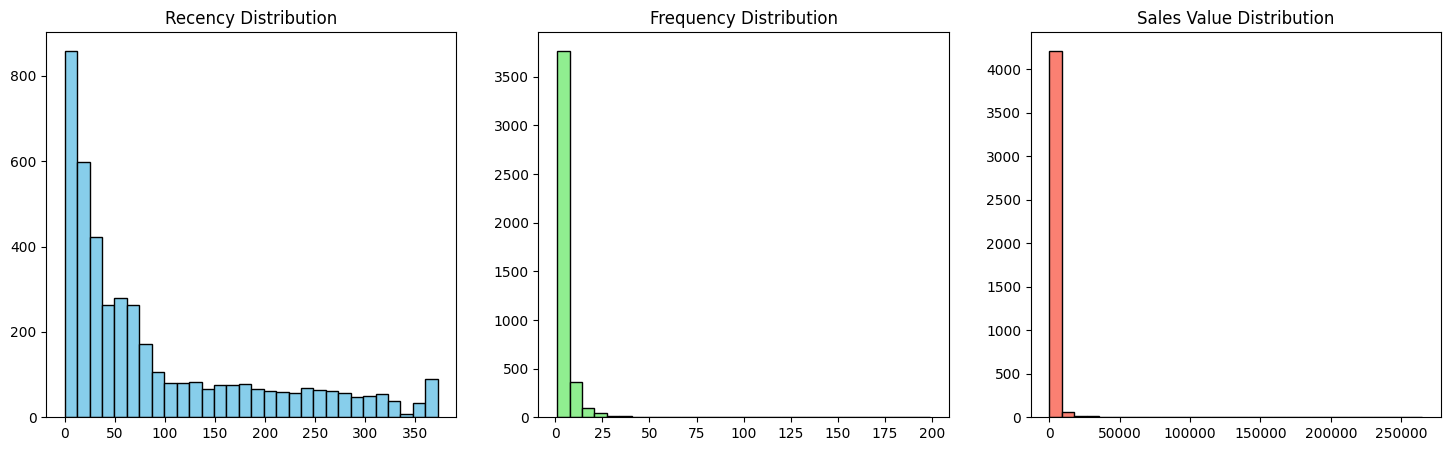

In [ ]:
# Graph distributions of RFM features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].hist(df_fe['recency_days'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution')
axes[1].hist(df_fe['frecuency'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[2].hist(df_fe['sale_value'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Sales Value Distribution')


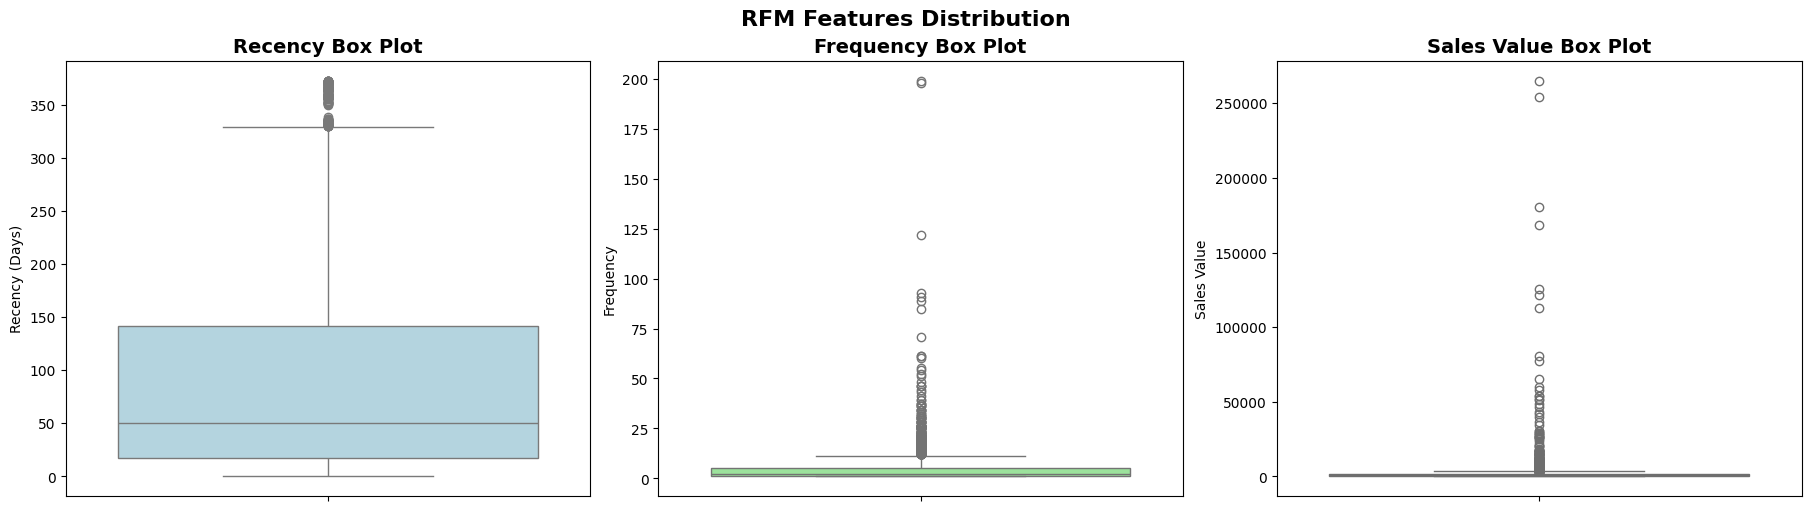

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Recency box plot
sns.boxplot(y=df_fe['recency_days'], ax=axes[0], color='lightblue')
axes[0].set_title('Recency Box Plot', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Recency (Days)')

# Frequency box plot
sns.boxplot(y=df_fe['frecuency'], ax=axes[1], color='lightgreen')
axes[1].set_title('Frequency Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Frequency')

# Sales value box plot
sns.boxplot(y=df_fe['sale_value'], ax=axes[2], color='lightcoral')
axes[2].set_title('Sales Value Box Plot', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Sales Value')

plt.suptitle('RFM Features Distribution', fontsize=16, fontweight='bold')
plt.show()
